# Построение ML-продукта для оптимизации классификации заявок на оплату для сервиса Repetit.ru

## Описание проекта

Сервис Repetit.ru работает с большим количеством заявок от клиентов. Конверия продажи 12,5% - 1 из 8 заявок. Обработка заявки консультантом увеличивает конверсию в оплату на 30%. Но консультантов не хватает на все заявки. Чем больше заявок — тем меньше конверсия. Консультанты тратят время на бесперспективные заявки.

## Задача

С целью отбора заявок для обработки вручную консультантом разработать модель, которая будет предсказывать вероятность оплаты. Оценка качества модели будет производиться с использованием precision и ROC-AUC.

____________________________________________________________________________

## Описание данных


Заявки (orders*.feather)

●	order_date - дата создания   
●	subject_id - предмет  
●	purpose - цель занятий  
●	lesson_price - цена  
●	lesson_duration - желаемая продолжительность урока  
●	home_metro_id - ближайшее метро  
●	add_info - доп инфо  
●	start_date - дата назначения репетитора
●	working_teacher_id  
●	status_id - оплачена ли заявка (значения 6 и 13 говорят о факте оплаты заявки)  
●	comments     
●	amount_to_pay  
●	planned_lesson_number - клиент планирует N занятий  
●	first_lesson_date - дата 1 занятия  
●	coef - коэффициент  
●	creator_id - кто создал заявку (id сотрудника или клиента)  
●	pupil_category_new_id - возраст ученика  
●	lessons_per_week - занятий а неделю  
●	minimal_price  
●	teacher_sex - пол репетитора  
●	teacher_experience_from - опыт репетитора от  
●	teacher_experience_to- опыт репетитора до  
●	lesson_place_new - онлайн, у ученика, у учителя  
●	pupil_knowledgelvl -уровень знаний ученика  
●	teacher_age_from - желаемый возраст репеитора от  
●	teacher_age_to - желаемый возраст репеитора от  
●	chosen_teachers_only - не предлагать репетиторов кроме выбранных самостоятельно  
●	no_teachers_available - на заявку нет подходящих репов  
●	source_id - где создана заявка (какая часть сайта, не регион)  
●	original_order_id - дублем какой заявки является эта заявка  
●	client_id - айди клиента  
●	additional_status_id  
●	max_metro_distance - максимально готов ехать от метро  
●	estimated_fee  
●	payment_date  
●	test_group - аб тесты  
●	is_display_to_teachers - хочет ли клиент получать отклики репетиторов  

Значения столбца status_id

■	1 Не обработана  
■	2 Контактный телефон отдан клиенту   
■	3 Проверена   
■	4 Контактный телефон отдан преподавателю   
■	5 Проведено первое занятие   
■	6 Оплачена   
■	7 Снята   
■	8 Отложена   
■	9 Договорились о занятиях   
■	11 Созвонились   
■	12 !!! Не оплачена !!!   
■	13 Произведена оплата   
■	14 Оплачена 25/50%   
■	15 Подлежит оплате   
■	16 Снята  
5,6,13,15 - считаем оплаченными  


Репетиторы (teacher_info.feather)  

●	date_update  
●	reg_date  
●	birth_date  
●	teaching_start_date
●	user_id - айди  
●	is_email_confirmed  
●	is_home_lessons  
●	is_external_lessons  
●	external_comments  
●	lesson_duration - продолжит урока  
●	lesson_cost - стоимость урока  
●	status_id  
●	status_relevant_date  
●	status_school_id  
●	status_college_id  
●	status_display  
●	russian_level_id  
●	home_country_id  
●	education  
●	information  
●	is_confirmed  
●	is_display - показывается в каталоге
●	rating_id    
●	rating - рейтинг  
●	comments  
●	rules_confirmed_date  
●	last_visited - послеждний визит  
●	is_pupils_needed - открыт для заявок  
●	is_cell_phone_confirmed  
●	effective_rating - какой-то еще рейтинг  
●	area_id  
●	registrar_id  
●	pupil_needed_date  
●	sex  
●	amount_to_pay - долг   
●	is_remote_lessons  
●	remote_comments  
●	show_on_map  
●	send_mailing  
●	send_suitable_orders  
●	rating_for_users - рейтинг 2  
●	rating_for_admin - рейтинг 3  
●	passport_id  
●	is_edited  
●	orders_allowed - разрешено назначать на заявки  
●	display_days  
●	verification_status_id  
●	is_individual  
●	partner_id  
●	star_rating - рейтинг 4  
●	rating_for_users_yesterday - рейтинг вчера  
●	review_num - отзывы  
●	relevance_date  
●	is_display_at_partners  
●	video_presentation_id - есть видеопрезентация  
●	status_institution_id  
●	Free_time_relevance_date  

Подходящие по фильтру репетиторы (suitable_teachers.feather)  

●	tteacher_id - id репетитора  
●	order_id - id заявки  
●	contact_result        
●	enable_auto_assign - доступен ли репетитор к работе или заблокирован (может ли репетитора назначить консультант и может ли он сам назначиться) (значение известно на момент подачи заявки)  
●	enable_assign - доступен ли репетитор к работе или заблокирован (может ли репетитора назначить консультант и может ли он сам назначиться) (значение известно на момент подачи заявки)  

Желаемые репетиторы (prefered_teachers_order_id.feather)
Репетиторы, которых клиент выбрал.

●	teacher_id - id репетитора  
●	order_id - id заявки  




## План

**1. Знакомство с данными**

    1.1 Импорт библиотек
    
    1.2 Загрузка данных
    
    1.3 Исследовательский анализ данных (размер, признаки, строки, типы данных, пропуски, аномалии, дубликаты, кореляция, распределение)
    
 **2. Предобработка данных**
    
    2.1 Преобразование типов данных
    
    2.2 Разбиение на выборки
    
    2.3 Нормализация значений
    
 **3. Обучение моделей**


 **4. Вывод**

 **5. Отчет**

**************

## Импорт библиотек

In [3]:
 pip install progress

  Preparing metadata (setup.py) ... done
  Created wheel for progress: filename=progress-1.6-py3-none-any.whl size=9612 sha256=04c7eee66ba3bfb87d5e6eca8956924287319ef7ad75908539d52d34317692b5
  Stored in directory: /root/.cache/pip/wheels/a2/68/5f/c339b20a41659d856c93ccdce6a33095493eb82c3964aac5a1
Successfully built progress


In [4]:
pip install tqdm -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.66.1
    Uninstalling tqdm-4.66.1:
      Successfully uninstalled tqdm-4.66.1


Устанавливать библиотеки в рамках тетрадки - считается плохой практикой. Eсли заказчик или коллега захочет воспрозвести исследование он сможет установить все необходимые пакеты используя данный файл.


In [5]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.2 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, cross_val_score

from catboost import CatBoostRegressor

from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import classification_report

from sklearn.utils.class_weight import compute_class_weight

from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.options.display.max_columns = 200
pd.options.display.max_rows = 200
pd.options.display.float_format = '{:.2f}'.format
pd.options.mode.chained_assignment = None

## Загрузка данных

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
df_orders = pd.read_feather('/content/drive/MyDrive/Colab Notebooks/portfolio/project/hackaton/4_репетитор/2_дата/orders.feather')

In [9]:
df_prefered_teachers_order_id = pd.read_feather('/content/drive/MyDrive/Colab Notebooks/portfolio/project/hackaton/4_репетитор/2_дата/prefered_teachers_order_id.feather')

In [10]:
df_suitable_teachers = pd.read_feather('/content/drive/MyDrive/Colab Notebooks/portfolio/project/hackaton/4_репетитор/2_дата/suitable_teachers.feather')

In [11]:
df_teachers_info = pd.read_feather('/content/drive/MyDrive/Colab Notebooks/portfolio/project/hackaton/4_репетитор/2_дата/teachers_info.feather')

Получены 4 таблицы с данными

df_orders – данные о заказах

df_prefered_teachers_order_id - Желаемые репетиторы

df_suitable_teachers - Подходящие по фильтру репетиторы

df_teachers_info - Репетиторы

Далее таблицы будут изменяться, сохраним оригиналы для получения исходной информации без повторной загрузки таблиц.

In [12]:
df_orders_orig = df_orders

In [13]:
df_prefered_teachers_order_id_orig = df_prefered_teachers_order_id

In [14]:
df_suitable_teachers_orig = df_suitable_teachers

In [15]:
df_teachers_info_orig = df_teachers_info

## Исследовательский анализ данных

Очевидно, что таблицы связаны между собой через данные столбцов. Для экономии ресурсов и удобной предобработки объеденим 3 датасета по схеме.  


df_suitable_teachers и df_teachers_info по столбцу teacher_id  
   
новый df_suitable_teachers и df_orders по столбцу order_id

Таблицу prefered_teacher_id - полностью не используем.  

Но до объединения изучим данные
1. насколько они нужны для обучения модели
2. утечка информации
3. аномалии и выбросы

Общая информация

#### Таблица df_orders

In [16]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191861 entries, 0 to 437216
Data columns (total 38 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   id                       1191861 non-null  int32  
 1   order_date               1191861 non-null  object 
 2   subject_id               1181529 non-null  float32
 3   purpose                  1025351 non-null  object 
 4   lesson_price             1191861 non-null  int32  
 5   lesson_duration          1191861 non-null  int32  
 6   lesson_place             31 non-null       object 
 7   home_metro_id            642447 non-null   float32
 8   add_info                 1044688 non-null  object 
 9   start_date               705578 non-null   object 
 10  working_teacher_id       705988 non-null   float32
 11  status_id                1191861 non-null  int32  
 12  comments                 341468 non-null   object 
 13  prefered_teacher_id      4 non-null        

Датасет состоит из 23 столбцов и 1470178 строк


В датасете тип  данных float64, int64, object.

Дополнительная информация по столбцам  
- order_date, start_date - содержит даты, нужно изменить тип данных object на datetime. start_date - утечка данных, удалим.
- purpose, add_info, comments - содержат текстовые данные

In [17]:
df_orders.head()

,id,order_date,subject_id,purpose,lesson_price,lesson_duration,lesson_place,home_metro_id,add_info,start_date,working_teacher_id,status_id,comments,prefered_teacher_id,amount_to_pay,planned_lesson_number,first_lesson_date,creator_id,pupil_category_new_id,lessons_per_week,minimal_price,teacher_sex,teacher_experience_from,teacher_experience_to,lesson_place_new,pupil_knowledgelvl,teacher_age_from,teacher_age_to,chosen_teachers_only,no_teachers_available,source_id,original_order_id,client_id,additional_status_id,max_metro_distance,estimated_fee,payment_date,is_display_to_teachers
0,2294054,2022-11-01 00:01:38.237,1.00,None,0,60,None,NaN,None,None,NaN,16,None,NaN,0,0,None,NaN,NaN,0,0,3,0,0,0,0,0,0,0,0,18,2294000.00,675960,7.00,NaN,None,None,1
1,2294055,2022-11-01 00:03:11.753,1.00,None,0,60,None,NaN,None,None,NaN,7,"\n01.11.2022 11:46 - ""Заявка прикреплена к зая...",NaN,0,0,None,NaN,NaN,0,0,3,0,0,0,0,0,0,0,0,18,2294000.00,675960,7.00,NaN,None,None,1
2,2294056,2022-11-01 00:04:01.563,21.00,Разделы: начертательная геометрия.\nКатегория ...,800,60,None,NaN,Место проведения занятий: дистанционно (наприм...,2022-11-01 10:37:02.567,143480.00,16,None,NaN,0,7,None,NaN,14.00,2,0,3,0,0,4,0,0,0,0,0,23,NaN,1024439,10.00,NaN,1200,None,1
3,2294057,2022-11-01 00:08:47.237,8.00,Разделы: школьный курс.\nКатегория ученика: ш...,700,60,None,NaN,Место проведения занятий: дистанционно (наприм...,2022-11-01 00:08:47.437,236392.00,16,None,NaN,0,10,None,47749.00,10.00,3,0,3,5,0,4,0,20,90,0,0,14,2293804.00,1024340,17.00,NaN,2310,None,1
4,2294058,2022-11-01 00:11:49.417,8.00,None,0,60,None,122.00,None,None,NaN,16,Тестовая группа : SplitTestA,NaN,0,0,None,NaN,NaN,0,0,0,0,0,2,0,0,0,0,0,16,NaN,1024440,5.00,NaN,None,None,1


In [18]:
df_orders['order_date'] = pd.to_datetime(df_orders['order_date'], errors = 'coerce')

In [19]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1191861 entries, 0 to 437216
Data columns (total 38 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   id                       1191861 non-null  int32         
 1   order_date               1191857 non-null  datetime64[ns]
 2   subject_id               1181529 non-null  float32       
 3   purpose                  1025351 non-null  object        
 4   lesson_price             1191861 non-null  int32         
 5   lesson_duration          1191861 non-null  int32         
 6   lesson_place             31 non-null       object        
 7   home_metro_id            642447 non-null   float32       
 8   add_info                 1044688 non-null  object        
 9   start_date               705578 non-null   object        
 10  working_teacher_id       705988 non-null   float32       
 11  status_id                1191861 non-null  int32         
 12  c

Имеются 2 вида пропущенных значений NaN и None

Заменяем пропуски None NaN для работы в Pandas

In [20]:
df_orders = df_orders.fillna(value=np.nan)

In [21]:
df_orders.head()

,id,order_date,subject_id,purpose,lesson_price,lesson_duration,lesson_place,home_metro_id,add_info,start_date,working_teacher_id,status_id,comments,prefered_teacher_id,amount_to_pay,planned_lesson_number,first_lesson_date,creator_id,pupil_category_new_id,lessons_per_week,minimal_price,teacher_sex,teacher_experience_from,teacher_experience_to,lesson_place_new,pupil_knowledgelvl,teacher_age_from,teacher_age_to,chosen_teachers_only,no_teachers_available,source_id,original_order_id,client_id,additional_status_id,max_metro_distance,estimated_fee,payment_date,is_display_to_teachers
0,2294054,2022-11-01 00:01:38.237,1.00,NaN,0,60,NaN,NaN,NaN,NaN,NaN,16,NaN,NaN,0,0,NaN,NaN,NaN,0,0,3,0,0,0,0,0,0,0,0,18,2294000.00,675960,7.00,NaN,NaN,NaN,1
1,2294055,2022-11-01 00:03:11.753,1.00,NaN,0,60,NaN,NaN,NaN,NaN,NaN,7,"\n01.11.2022 11:46 - ""Заявка прикреплена к зая...",NaN,0,0,NaN,NaN,NaN,0,0,3,0,0,0,0,0,0,0,0,18,2294000.00,675960,7.00,NaN,NaN,NaN,1
2,2294056,2022-11-01 00:04:01.563,21.00,Разделы: начертательная геометрия.\nКатегория ...,800,60,NaN,NaN,Место проведения занятий: дистанционно (наприм...,2022-11-01 10:37:02.567,143480.00,16,NaN,NaN,0,7,NaN,NaN,14.00,2,0,3,0,0,4,0,0,0,0,0,23,NaN,1024439,10.00,NaN,1200,NaN,1
3,2294057,2022-11-01 00:08:47.237,8.00,Разделы: школьный курс.\nКатегория ученика: ш...,700,60,NaN,NaN,Место проведения занятий: дистанционно (наприм...,2022-11-01 00:08:47.437,236392.00,16,NaN,NaN,0,10,NaN,47749.00,10.00,3,0,3,5,0,4,0,20,90,0,0,14,2293804.00,1024340,17.00,NaN,2310,NaN,1
4,2294058,2022-11-01 00:11:49.417,8.00,NaN,0,60,NaN,122.00,NaN,NaN,NaN,16,Тестовая группа : SplitTestA,NaN,0,0,NaN,NaN,NaN,0,0,0,0,0,2,0,0,0,0,0,16,NaN,1024440,5.00,NaN,NaN,NaN,1


In [22]:
df_orders_nan = pd.DataFrame(df_orders.isna().mean().sort_values(ascending=False), columns=['nan'])
df_orders_nan

,nan
prefered_teacher_id,1.00
lesson_place,1.00
max_metro_distance,0.99
payment_date,0.89
first_lesson_date,0.86
comments,0.71
creator_id,0.51
original_order_id,0.51
home_metro_id,0.46
start_date,0.41


Значительное количество столбцов имеет пропуски более 40%. Удалим такие столбцы и все строки с пропусками

In [23]:
df_orders_nan[df_orders_nan['nan'] > 0.4].index.to_list()

['prefered_teacher_id',
 'lesson_place',
 'max_metro_distance',
 'payment_date',
 'first_lesson_date',
 'comments',
 'creator_id',
 'original_order_id',
 'home_metro_id',
 'start_date',
 'working_teacher_id']

Функция для удаления столбцов с пропусками более 40% (будем применять для других таблиц)

In [24]:
def col_dropna(data):
  new_data = pd.DataFrame(data.isna().mean(), columns =['nan'])
  new_data = new_data[new_data['nan'] > 0.4]
  data = data.drop(new_data.index.to_list(), axis= 1 , inplace = True)

  return data

In [25]:
col_dropna(df_orders)

In [26]:
df_orders.isna().mean().sort_values(ascending=False)

estimated_fee             0.37
purpose                   0.14
pupil_category_new_id     0.13
additional_status_id      0.13
add_info                  0.12
subject_id                0.01
order_date                0.00
id                        0.00
lesson_place_new          0.00
client_id                 0.00
source_id                 0.00
no_teachers_available     0.00
chosen_teachers_only      0.00
teacher_age_to            0.00
teacher_age_from          0.00
pupil_knowledgelvl        0.00
teacher_sex               0.00
teacher_experience_to     0.00
teacher_experience_from   0.00
minimal_price             0.00
lessons_per_week          0.00
planned_lesson_number     0.00
amount_to_pay             0.00
status_id                 0.00
lesson_duration           0.00
lesson_price              0.00
is_display_to_teachers    0.00
dtype: float64

Удаляем пропуски - данных для обучения достаточно

In [27]:
df_orders.head()

,id,order_date,subject_id,purpose,lesson_price,lesson_duration,add_info,status_id,amount_to_pay,planned_lesson_number,pupil_category_new_id,lessons_per_week,minimal_price,teacher_sex,teacher_experience_from,teacher_experience_to,lesson_place_new,pupil_knowledgelvl,teacher_age_from,teacher_age_to,chosen_teachers_only,no_teachers_available,source_id,client_id,additional_status_id,estimated_fee,is_display_to_teachers
0,2294054,2022-11-01 00:01:38.237,1.00,NaN,0,60,NaN,16,0,0,NaN,0,0,3,0,0,0,0,0,0,0,0,18,675960,7.00,NaN,1
1,2294055,2022-11-01 00:03:11.753,1.00,NaN,0,60,NaN,7,0,0,NaN,0,0,3,0,0,0,0,0,0,0,0,18,675960,7.00,NaN,1
2,2294056,2022-11-01 00:04:01.563,21.00,Разделы: начертательная геометрия.\nКатегория ...,800,60,Место проведения занятий: дистанционно (наприм...,16,0,7,14.00,2,0,3,0,0,4,0,0,0,0,0,23,1024439,10.00,1200,1
3,2294057,2022-11-01 00:08:47.237,8.00,Разделы: школьный курс.\nКатегория ученика: ш...,700,60,Место проведения занятий: дистанционно (наприм...,16,0,10,10.00,3,0,3,5,0,4,0,20,90,0,0,14,1024340,17.00,2310,1
4,2294058,2022-11-01 00:11:49.417,8.00,NaN,0,60,NaN,16,0,0,NaN,0,0,0,0,0,2,0,0,0,0,0,16,1024440,5.00,NaN,1


In [28]:
df_orders = df_orders.dropna().reset_index()

Удалены столбцы с пропусками более 40%  
'prefered_teacher_id'  
'lesson_place'  
'max_metro_distance'  
'payment_date'  
'first_lesson_date'  
'comments'  
'creator_id'  
'original_order_id'  
'home_metro_id'  
'start_date'  
'working_teacher_id  

In [29]:
df_orders = df_orders.drop(['index'], axis=1)

Удалим столбцы дающие утечку данных

Таблица orders  
'estimated_fee', 'additional_status_id', 'amount_to_pay', 'first_lesson_date', 'additional_status_id', 'estimated_fee', 'payment_date', 'client_id', 'add info', 'comments'  - данные из будущего, а прогноз строим для момента получения заявки.  
client_id - так же дает утечку, нам важно прогнозировать новых клиентов
Столбец status_id содержит инфо об оплате заказа, на его основании будем делать таргет, а сам столбец удалим позже.

In [30]:
list_leak = ['estimated_fee', 'additional_status_id', 'amount_to_pay', 'first_lesson_date', 'additional_status_id', 'estimated_fee', 'payment_date', 'client_id', 'add info', 'comments']

In [31]:
list_to_drop = []
for i in df_orders.columns:
  if i in list_leak:
    list_to_drop.append(i)
list_to_drop

['amount_to_pay', 'client_id', 'additional_status_id', 'estimated_fee']

In [32]:
df_orders.drop(list_to_drop, axis= 1 , inplace= True)

Аномалии, выбросы и другие отклонения

In [33]:
df_orders_col_list = df_orders.columns.to_list()
df_orders_col_list

['id',
 'order_date',
 'subject_id',
 'purpose',
 'lesson_price',
 'lesson_duration',
 'add_info',
 'status_id',
 'planned_lesson_number',
 'pupil_category_new_id',
 'lessons_per_week',
 'minimal_price',
 'teacher_sex',
 'teacher_experience_from',
 'teacher_experience_to',
 'lesson_place_new',
 'pupil_knowledgelvl',
 'teacher_age_from',
 'teacher_age_to',
 'chosen_teachers_only',
 'no_teachers_available',
 'source_id',
 'is_display_to_teachers']

In [34]:
df_orders[df_orders_col_list].describe()

,id,subject_id,lesson_price,lesson_duration,status_id,planned_lesson_number,pupil_category_new_id,lessons_per_week,minimal_price,teacher_sex,teacher_experience_from,teacher_experience_to,lesson_place_new,pupil_knowledgelvl,teacher_age_from,teacher_age_to,chosen_teachers_only,no_teachers_available,source_id,is_display_to_teachers
count,600094.00,600094.00,600094.00,600094.00,600094.00,600094.00,600094.00,600094.00,600094.00,600094.00,600094.00,600094.00,600094.00,600094.00,600094.00,600094.00,600094.00,600094.00,600094.00,600094.00
mean,2364168.40,9.81,1381.00,60.98,15.26,9.66,10.03,3.52,273.81,2.38,1.62,0.71,3.45,0.50,9.79,19.05,0.02,0.05,16.91,0.96
std,333739.56,7.47,2411.77,8.60,2.33,1.32,3.67,1.12,1296.00,0.81,2.83,7.14,1.56,0.94,13.66,44.75,0.13,0.21,4.75,0.20
min,1742636.00,1.00,0.00,0.00,4.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-40.00,-110.00,0.00,0.00,0.00,0.00
25%,2082106.50,3.00,800.00,60.00,16.00,10.00,8.00,3.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,14.00,1.00
50%,2396598.50,8.00,1000.00,60.00,16.00,10.00,10.00,3.00,0.00,3.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,14.00,1.00
75%,2647516.25,13.00,1500.00,60.00,16.00,10.00,12.00,4.00,500.00,3.00,3.00,0.00,4.00,1.00,24.00,50.00,0.00,0.00,23.00,1.00
max,2936677.00,36.00,600000.00,135.00,16.00,10.00,17.00,7.00,450000.00,3.00,51.00,100.00,7.00,4.00,4016.00,25000.00,1.00,1.00,26.00,1.00


Столбец lesson_price

In [35]:
df_orders['lesson_price'].describe()

count   600094.00
mean      1381.00
std       2411.77
min          0.00
25%        800.00
50%       1000.00
75%       1500.00
max     600000.00
Name: lesson_price, dtype: float64

In [36]:
df_orders[df_orders['lesson_price'] <= 300]['lesson_price'].value_counts()

300    863
0      421
250     86
200     21
100      7
150      3
10       3
90       2
20       2
110      1
120      1
260      1
1        1
170      1
Name: lesson_price, dtype: int64

In [37]:
df_orders[df_orders['lesson_price'] > 5000]['lesson_price'].value_counts()

6000      354
10000     131
7000      125
7500       74
50000      68
8000       63
5001       56
30000      46
40000      42
20000      40
12000      27
15000      27
60000      27
25000      26
80000      24
9000       21
24000      18
35000      18
16000      17
90000      16
120000     12
100000     11
65000      10
6500        9
45000       9
19000       8
8500        8
5250        6
25200       6
5600        5
17500       5
11000       5
29000       5
5500        5
180000      4
14000       4
21000       4
70000       4
13000       4
23000       3
138000      3
18000       3
38000       3
46000       3
600000      3
11200       3
200000      3
43500       3
85000       3
6300        2
50001       2
150000      2
9262        2
500000      2
75000       2
27000       2
7200        2
74000       2
22000       2
32000       2
37800       1
6400        1
11250       1
6200        1
5700        1
10800       1
5100        1
10090       1
Name: lesson_price, dtype: int64

Описательная статистика столбца lesson_price демонстрирует выбросы. На сайте Repetit.ru максимальная стоимость указана 5000 р. Также имеем значения равные 0 - 421 наблюдение, удалим. Количество небольшое, но это не соответствует действительности. Примем так же, что уроки дешевле 300 р. - это аномалия.

<Axes: >

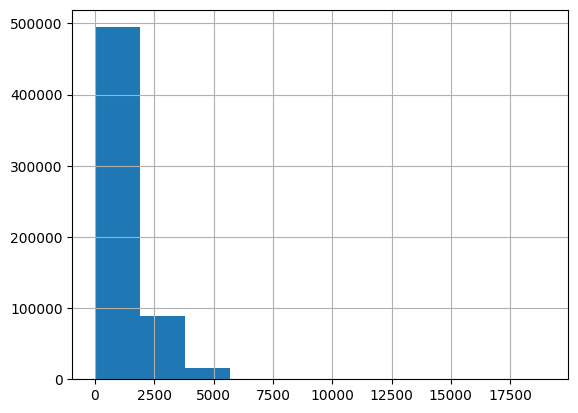

In [38]:
df_orders[df_orders['lesson_price']<20000]['lesson_price'].hist()

In [39]:
len(df_orders[df_orders['lesson_price'].between(0, 5001)]) / len(df_orders)

0.9977536852559765

Доля заказов до 5000 р. более 99% - оставим только такие заказы

In [40]:
df_orders = df_orders[(df_orders['lesson_price'] <= 5000) & (df_orders['lesson_price'] > 300)]
df_orders['lesson_price'].describe()

count   597277.00
mean      1333.48
std        822.85
min        320.00
25%        800.00
50%       1000.00
75%       1500.00
max       5000.00
Name: lesson_price, dtype: float64

Столбец minimal_price

In [41]:
df_orders['minimal_price'].describe()

count   597277.00
mean       257.45
std        430.56
min          0.00
25%          0.00
50%          0.00
75%        500.00
max      30000.00
Name: minimal_price, dtype: float64

Выбросы до 450000 удалены выше

Столбец teacher_experience_to

In [42]:
df_orders['teacher_experience_to'].describe()

count   597277.00
mean         0.71
std          7.15
min          0.00
25%          0.00
50%          0.00
75%          0.00
max        100.00
Name: teacher_experience_to, dtype: float64

In [43]:
df_orders['teacher_experience_to'].value_counts()

0      590358
50       1473
100      1010
60        975
70        911
80        748
10        483
90        405
5         222
30        180
40        113
55        107
20         80
35         26
65         23
32         20
45         18
25         18
12         16
42         13
1          11
15          9
22          9
27          8
3           5
24          4
8           4
4           3
16          3
28          3
17          3
6           3
38          2
49          2
29          2
7           1
82          1
88          1
66          1
75          1
48          1
21          1
Name: teacher_experience_to, dtype: int64

In [44]:
len(df_orders[df_orders['teacher_experience_to'] == 0]) / len(df_orders)

0.9884157601916699

Значения столбца равные 0 составляю более 99% - удаляем столбец

In [45]:
df_orders = df_orders.drop(['teacher_experience_to'], axis=1)

In [46]:
df_orders_col_list = df_orders.columns.to_list()
df_orders[df_orders_col_list].describe()

,id,subject_id,lesson_price,lesson_duration,status_id,planned_lesson_number,pupil_category_new_id,lessons_per_week,minimal_price,teacher_sex,teacher_experience_from,lesson_place_new,pupil_knowledgelvl,teacher_age_from,teacher_age_to,chosen_teachers_only,no_teachers_available,source_id,is_display_to_teachers
count,597277.00,597277.00,597277.00,597277.00,597277.00,597277.00,597277.00,597277.00,597277.00,597277.00,597277.00,597277.00,597277.00,597277.00,597277.00,597277.00,597277.00,597277.00,597277.00
mean,2364995.09,9.81,1333.48,61.03,15.26,9.67,10.03,3.52,257.45,2.38,1.63,3.45,0.50,9.79,19.05,0.02,0.05,16.92,0.96
std,333632.24,7.47,822.85,8.27,2.33,1.31,3.66,1.12,430.56,0.81,2.83,1.56,0.94,13.66,44.81,0.13,0.21,4.75,0.20
min,1742636.00,1.00,320.00,0.00,4.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,-40.00,-110.00,0.00,0.00,0.00,0.00
25%,2083201.00,3.00,800.00,60.00,16.00,10.00,8.00,3.00,0.00,2.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,14.00,1.00
50%,2398016.00,8.00,1000.00,60.00,16.00,10.00,10.00,3.00,0.00,3.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,14.00,1.00
75%,2648217.00,13.00,1500.00,60.00,16.00,10.00,12.00,4.00,500.00,3.00,3.00,4.00,1.00,24.00,50.00,0.00,0.00,23.00,1.00
max,2936677.00,36.00,5000.00,135.00,16.00,10.00,17.00,7.00,30000.00,3.00,51.00,7.00,4.00,4016.00,25000.00,1.00,1.00,26.00,1.00


Столбцы teacher_age_from и	teacher_age_to

Предположим, что возраст преподавателя варьируется в пределах 18 - 75

In [47]:
df_orders[(df_orders[['teacher_age_from', 'teacher_age_to']] >= 18) & (
    df_orders[['teacher_age_from', 'teacher_age_to']] <=75
          )][['teacher_age_from', 'teacher_age_to']].value_counts()

teacher_age_from  teacher_age_to
25.00             50.00             45873
30.00             50.00              9200
18.00             30.00              3176
25.00             60.00              3082
                  55.00              2885
                                    ...  
29.00             44.00                 1
                  51.00                 1
                  53.00                 1
                  54.00                 1
72.00             72.00                 1
Length: 632, dtype: int64

In [48]:
df_orders[(df_orders['teacher_age_from'] >= 18) & (df_orders['teacher_age_from'] <=75)]['teacher_age_from'].value_counts()

25    94151
30    30032
18    22279
20    12392
23     9147
22     8754
24     6730
27     5180
35     4909
28     3577
40     3329
19     3163
21     2560
26     2397
50     2153
45      689
29      330
38      129
32      106
33       94
37       77
36       47
31       35
34       31
39       28
60       22
43       12
55       11
42        7
44        7
47        6
48        5
46        4
54        3
41        2
51        1
72        1
65        1
56        1
52        1
Name: teacher_age_from, dtype: int64

In [49]:
df_orders[(df_orders['teacher_age_to'] >= 18) & (df_orders['teacher_age_to'] <=75)]['teacher_age_to'].value_counts()

50    76844
30    11202
55    10969
40    10672
60    10467
45     9770
65     8822
35     8318
25     6962
70     3576
27      317
56      265
48      187
28      186
47      179
75      178
37      177
52      149
53      143
33      141
57      127
38      114
46      110
36      103
58       94
54       92
32       92
43       85
63       85
26       82
67       77
59       66
42       64
23       63
68       61
66       54
49       51
61       49
51       45
62       44
39       43
29       41
20       40
22       35
41       31
44       29
24       26
31       25
34       25
21       19
69       19
74       17
72       12
64       12
19        7
73        4
18        3
71        2
Name: teacher_age_to, dtype: int64

In [50]:
len(df_orders[(df_orders['teacher_age_from'] >= 18) & (df_orders['teacher_age_from'] <=75)]) / len(df_orders)

0.35561891718582833

In [51]:
len(df_orders[(df_orders['teacher_age_to'] >= 18) & (df_orders['teacher_age_to'] <=75)]) / len(df_orders)

0.2703469244588357

От 18 до 75, такой возраст только у 35% и 26 % преподавателей оп столбцам  teacher_age_from и	teacher_age_to. Проверим, что там за информация

In [52]:
df_orders[(df_orders['teacher_age_from'] >= 18) & (df_orders['teacher_age_from'] <=75)][['teacher_age_from', 'teacher_age_to']].describe()

,teacher_age_from,teacher_age_to
count,212403.00,212403.00
mean,25.24,39.07
std,5.07,30.28
min,18.00,-50.00
25%,23.00,0.00
50%,25.00,50.00
75%,26.00,55.00
max,72.00,1000.00


Вероятно, такие столбцы лучше удалить.

In [53]:
df_orders.head()

,id,order_date,subject_id,purpose,lesson_price,lesson_duration,add_info,status_id,planned_lesson_number,pupil_category_new_id,lessons_per_week,minimal_price,teacher_sex,teacher_experience_from,lesson_place_new,pupil_knowledgelvl,teacher_age_from,teacher_age_to,chosen_teachers_only,no_teachers_available,source_id,is_display_to_teachers
0,2294056,2022-11-01 00:04:01.563,21.00,Разделы: начертательная геометрия.\nКатегория ...,800,60,Место проведения занятий: дистанционно (наприм...,16,7,14.00,2,0,3,0,4,0,0,0,0,0,23,1
1,2294057,2022-11-01 00:08:47.237,8.00,Разделы: школьный курс.\nКатегория ученика: ш...,700,60,Место проведения занятий: дистанционно (наприм...,16,10,10.00,3,0,3,5,4,0,20,90,0,0,14,1
2,2294071,2022-11-01 00:43:22.940,21.00,Разделы: ораторское искусство.\nКатегория учен...,3000,60,Место проведения занятий: дистанционно (наприм...,16,10,14.00,5,2000,3,0,4,0,0,0,0,0,23,1
3,2294072,2022-11-01 00:45:46.343,8.00,Разделы: школьный курс.\nКатегория ученика: ш...,1500,60,Район: м. Перово.\nМесто проведения занятий: у...,16,10,9.00,2,0,3,0,1,0,0,0,0,0,23,1
4,2294073,2022-11-01 01:01:18.983,9.00,Разделы: теоретическая механика.\nКатегория уч...,1500,60,Район: м. Ломоносовская.\nМесто проведения зан...,16,1,14.00,2,0,3,0,2,0,0,0,0,0,23,1


In [54]:
df_orders = df_orders.drop(['teacher_age_from', 'teacher_age_to'], axis=1)

In [55]:
df_orders_col_list = df_orders.columns.to_list()
df_orders[df_orders_col_list].describe()

,id,subject_id,lesson_price,lesson_duration,status_id,planned_lesson_number,pupil_category_new_id,lessons_per_week,minimal_price,teacher_sex,teacher_experience_from,lesson_place_new,pupil_knowledgelvl,chosen_teachers_only,no_teachers_available,source_id,is_display_to_teachers
count,597277.00,597277.00,597277.00,597277.00,597277.00,597277.00,597277.00,597277.00,597277.00,597277.00,597277.00,597277.00,597277.00,597277.00,597277.00,597277.00,597277.00
mean,2364995.09,9.81,1333.48,61.03,15.26,9.67,10.03,3.52,257.45,2.38,1.63,3.45,0.50,0.02,0.05,16.92,0.96
std,333632.24,7.47,822.85,8.27,2.33,1.31,3.66,1.12,430.56,0.81,2.83,1.56,0.94,0.13,0.21,4.75,0.20
min,1742636.00,1.00,320.00,0.00,4.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2083201.00,3.00,800.00,60.00,16.00,10.00,8.00,3.00,0.00,2.00,0.00,2.00,0.00,0.00,0.00,14.00,1.00
50%,2398016.00,8.00,1000.00,60.00,16.00,10.00,10.00,3.00,0.00,3.00,0.00,4.00,0.00,0.00,0.00,14.00,1.00
75%,2648217.00,13.00,1500.00,60.00,16.00,10.00,12.00,4.00,500.00,3.00,3.00,4.00,1.00,0.00,0.00,23.00,1.00
max,2936677.00,36.00,5000.00,135.00,16.00,10.00,17.00,7.00,30000.00,3.00,51.00,7.00,4.00,1.00,1.00,26.00,1.00


Посмотрим, какие столбцы содержат значения равные 0 более 50%

Сделаем функцию, которая дает такую информацию

In [56]:
def zero(data, col):
  list_col = []
  list_vol = []
  for i in col:
    if len(data[data[i] == 0]) > 0:
      list_col.append(i)
      list_vol.append(len(data[data[i] == 0]) / len(data))
      dict = {'column': list_col, 'zero_part': list_vol}
      data_new = dframe2 = pd.DataFrame(list(zip(list_col, list_vol)), columns =['column', 'zero_part'])
      data_new = data_new.sort_values(by = 'zero_part', ascending= False)
      data_new = data_new[data_new['zero_part'] > 0.5]

  return data_new

In [57]:
data_zero = zero(df_orders, df_orders_col_list)
data_zero

,column,zero_part
8,chosen_teachers_only,0.98
9,no_teachers_available,0.95
7,pupil_knowledgelvl,0.74
5,teacher_experience_from,0.67
3,minimal_price,0.66


Удалим столбцы с такими значениями

In [58]:
df_orders = df_orders.drop(data_zero['column'].to_list(), axis=1)

In [59]:
df_orders_col_list = df_orders.columns.to_list()
df_orders[df_orders_col_list].describe()

,id,subject_id,lesson_price,lesson_duration,status_id,planned_lesson_number,pupil_category_new_id,lessons_per_week,teacher_sex,lesson_place_new,source_id,is_display_to_teachers
count,597277.00,597277.00,597277.00,597277.00,597277.00,597277.00,597277.00,597277.00,597277.00,597277.00,597277.00,597277.00
mean,2364995.09,9.81,1333.48,61.03,15.26,9.67,10.03,3.52,2.38,3.45,16.92,0.96
std,333632.24,7.47,822.85,8.27,2.33,1.31,3.66,1.12,0.81,1.56,4.75,0.20
min,1742636.00,1.00,320.00,0.00,4.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,2083201.00,3.00,800.00,60.00,16.00,10.00,8.00,3.00,2.00,2.00,14.00,1.00
50%,2398016.00,8.00,1000.00,60.00,16.00,10.00,10.00,3.00,3.00,4.00,14.00,1.00
75%,2648217.00,13.00,1500.00,60.00,16.00,10.00,12.00,4.00,3.00,4.00,23.00,1.00
max,2936677.00,36.00,5000.00,135.00,16.00,10.00,17.00,7.00,3.00,7.00,26.00,1.00


In [60]:
df_orders.head()

,id,order_date,subject_id,purpose,lesson_price,lesson_duration,add_info,status_id,planned_lesson_number,pupil_category_new_id,lessons_per_week,teacher_sex,lesson_place_new,source_id,is_display_to_teachers
0,2294056,2022-11-01 00:04:01.563,21.00,Разделы: начертательная геометрия.\nКатегория ...,800,60,Место проведения занятий: дистанционно (наприм...,16,7,14.00,2,3,4,23,1
1,2294057,2022-11-01 00:08:47.237,8.00,Разделы: школьный курс.\nКатегория ученика: ш...,700,60,Место проведения занятий: дистанционно (наприм...,16,10,10.00,3,3,4,14,1
2,2294071,2022-11-01 00:43:22.940,21.00,Разделы: ораторское искусство.\nКатегория учен...,3000,60,Место проведения занятий: дистанционно (наприм...,16,10,14.00,5,3,4,23,1
3,2294072,2022-11-01 00:45:46.343,8.00,Разделы: школьный курс.\nКатегория ученика: ш...,1500,60,Район: м. Перово.\nМесто проведения занятий: у...,16,10,9.00,2,3,1,23,1
4,2294073,2022-11-01 01:01:18.983,9.00,Разделы: теоретическая механика.\nКатегория уч...,1500,60,Район: м. Ломоносовская.\nМесто проведения зан...,16,1,14.00,2,3,2,23,1


Таблица df_orders  

Удалены строки с пропусками  
Удалены столбцы с пропусками значений более 40%  
Удалены столбцы, которые содержат значения равные 0 более 50%  
Удалены столбцы, дающие утечку данных  
Удалены выбросы и аномалии  


#### Таблица df_suitable_teachers

In [61]:
df_suitable_teachers.head()

,teacher_id,order_id,contact_result,enable_auto_assign,enable_assign
0,82583,1742711,Репетитор согласился,1,1
1,125057,1742713,"Репетитор положил трубку, либо обрыв связи (Ok...",0,0
2,231211,1742713,"Репетитор положил трубку, либо обрыв связи (Ok...",0,0
3,128773,1742713,"Репетитор положил трубку, либо обрыв связи (Ok...",0,0
4,63019,1742713,Репетитор согласился,0,1


In [62]:
df_suitable_teachers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20271186 entries, 0 to 20271185
Data columns (total 5 columns):
 #   Column              Dtype   
---  ------              -----   
 0   teacher_id          int32   
 1   order_id            int32   
 2   contact_result      category
 3   enable_auto_assign  int8    
 4   enable_assign       int8    
dtypes: category(1), int32(2), int8(2)
memory usage: 232.3 MB


Датасет состоит из 5 столбцов и 20271186  строк


В датасете тип  данных int32, int8, category.

Дополнительная информация по столбцам  
- contact_result - содержат текстовые данные

Проверим наличие пропущенных значений

In [63]:
df_suitable_teachers.isna().mean().sort_values(ascending=False)

contact_result       0.63
teacher_id           0.00
order_id             0.00
enable_auto_assign   0.00
enable_assign        0.00
dtype: float64

Cтолбец contact_result имеет пропуски - 63%. Проверим более детально.

In [64]:
df_suitable_teachers[df_suitable_teachers.isna().any(axis=1)]

,teacher_id,order_id,contact_result,enable_auto_assign,enable_assign
24,176625,1742724,NaN,0,0
26,176625,1742725,NaN,0,0
35,208987,1742726,NaN,0,0
36,235169,1742726,NaN,0,0
37,231843,1742726,NaN,0,0
...,...,...,...,...,...
20271181,292878,2946697,NaN,0,0
20271182,36028,2946079,NaN,0,0
20271183,180592,2946079,NaN,0,0
20271184,87326,2946079,NaN,0,0


В данном случае удалить можно строки с пропусками или столбец contact_result. Удалим столбец и далее помотрим на результат, к этому вопросу можем вернуться позже и изменить тактику. К тому же, этот признак дает data leak, т.к. этот результат на момент подачи заявки не известен.

In [65]:
df_suitable_teachers = df_suitable_teachers.drop('contact_result', axis=1)

In [66]:
df_suitable_teachers.shape

(20271186, 4)

Таблица df_suitable_teachers - удален столбец contact_result



#### Таблица df_teachers_info

In [67]:
df_teachers_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307972 entries, 0 to 307971
Data columns (total 80 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   id                          307972 non-null  int32   
 1   date_update                 307972 non-null  category
 2   reg_date                    307972 non-null  category
 3   birth_date                  307972 non-null  category
 4   teaching_start_date         307972 non-null  category
 5   user_id                     307972 non-null  int32   
 6   is_email_confirmed          307972 non-null  int8    
 7   is_home_lessons             307972 non-null  int8    
 8   is_external_lessons         307972 non-null  int8    
 9   external_comments           90978 non-null   category
 10  lesson_duration             307972 non-null  int16   
 11  lesson_cost                 307972 non-null  int32   
 12  status_id                   307972 non-null  int8    
 13 

Датасет состоит из 37 столбцов и 1191861 строк


В датасете тип  данных float32, int32, object.

In [68]:
df_teachers_info.head()

,id,date_update,reg_date,birth_date,teaching_start_date,user_id,is_email_confirmed,is_home_lessons,is_external_lessons,external_comments,lesson_duration,lesson_cost,status_id,status_relevant_date,status_school_id,status_college_id,status_display,russian_level_id,home_country_id,information,is_confirmed,external_comments.1,lesson_duration.1,lesson_cost.1,status_id.1,status_relevant_date.1,status_school_id.1,status_college_id.1,status_display.1,russian_level_id.1,home_country_id.1,information.1,is_confirmed.1,external_comments.2,lesson_duration.2,lesson_cost.2,status_id.2,status_relevant_date.2,status_school_id.2,status_college_id.2,status_display.2,russian_level_id.2,home_country_id.2,photo_path,information.2,is_confirmed.2,is_display,rating_id,rating,comments,rules_confirmed_date,last_visited,is_pupils_needed,is_cell_phone_confirmed,effective_rating,area_id,pupil_needed_date,sex,amount_to_pay,is_remote_lessons,remote_comments,show_on_map,send_mailing,send_suitable_orders,rating_for_users,rating_for_admin,passport_id,is_edited,orders_allowed,display_days,verification_status_id,is_individual,partner_id,star_rating,rating_for_users_yesterday,review_num,relevance_date,is_display_at_partners,status_institution_id,free_time_relevance_date
0,33,2023-11-07 14:20:28.323,2007-12-24 19:26:46.000,1983-06-05 00:00:00.000,1989-09-01 00:00:00.000,45,0,0,0,NaN,60,1000,4,NaN,NaN,NaN,0,5,7,[p]&nbsp;[/p][p]&nbsp;[/p][p]?[/p][p]133320 Ка...,1,NaN,60,1000,4,NaN,NaN,NaN,0,5,7,[p]&nbsp;[/p][p]&nbsp;[/p][p]?[/p][p]133320 Ка...,1,NaN,60,1000,4,NaN,NaN,NaN,0,5,7,/teachers/33/photo/photo_small.jpg,[p]&nbsp;[/p][p]&nbsp;[/p][p]?[/p][p]133320 Ка...,1,1,15,5,Швачко М.Н. 15.01.2018 14:59 - 33\r\nАникеева ...,2016-02-12 21:06:51.000,2022-10-24 16:48:38.410,1.00,0,4.68,1,NaN,1,500,1,NaN,0,1,0,1138.00,237.50,NaN,1,0,492.00,1,NaN,NaN,4.50,1138.00,6,2022-05-16 18:44:59.993,0,3702.00,2023-11-06 14:20:15.173
1,46,2023-01-19 17:36:42.233,2007-12-24 19:26:46.000,1980-02-12 00:00:00.000,2003-09-01 00:00:00.000,63,0,1,1,NaN,60,500,5,NaN,NaN,NaN,1,5,7,NaN,1,NaN,60,500,5,NaN,NaN,NaN,1,5,7,NaN,1,NaN,60,500,5,NaN,NaN,NaN,1,5,7,/teachers/46/photo/photo_small.webp,NaN,1,0,4,-3,NaN,2014-08-12 00:00:00.000,NaN,1.00,0,0.00,1,NaN,3,0,0,NaN,0,1,1,25.00,0.00,NaN,1,1,0.00,1,NaN,NaN,4.30,25.00,0,2017-01-01 00:00:00.000,1,NaN,NaN
2,51,2023-05-25 09:04:45.243,2007-12-24 19:26:46.000,1965-04-30 00:00:00.000,1988-09-01 00:00:00.000,68,0,0,0,NaN,60,1500,5,NaN,NaN,NaN,1,5,7,[p]Готовлю к ЕГЭ и ОГЭ более 20 лет. Мои учени...,1,NaN,60,1500,5,NaN,NaN,NaN,1,5,7,[p]Готовлю к ЕГЭ и ОГЭ более 20 лет. Мои учени...,1,NaN,60,1500,5,NaN,NaN,NaN,1,5,7,/teachers/51/photo/photo_small.webp,[p]Готовлю к ЕГЭ и ОГЭ более 20 лет. Мои учени...,1,0,16,6,NaN,2016-04-06 16:08:24.000,2022-09-26 09:43:56.123,1.00,0,6.00,1,NaN,2,0,1,Только удаленные занятия по Skype.,0,1,0,300.00,0.00,NaN,1,1,2182.00,3,0.00,NaN,4.30,300.00,0,2017-01-01 00:00:00.000,0,NaN,NaN
3,52,2023-01-19 10:39:20.767,2007-12-24 19:26:46.000,1988-07-06 00:00:00.000,2006-09-01 00:00:00.000,69,0,0,1,Ближайший район: м. Алтуфьево.,60,1000,5,NaN,NaN,NaN,1,5,7,NaN,1,Ближайший район: м. Алтуфьево.,60,1000,5,NaN,NaN,NaN,1,5,7,NaN,1,Ближайший район: м. Алтуфьево.,60,1000,5,NaN,NaN,NaN,1,5,7,/teachers/52/photo/photo_small.webp,NaN,1,1,16,6,NaN,2014-08-12 00:00:00.000,2020-04-03 15:53:50.867,0.00,0,11.29,1,2019-12-31 00:00:00.000,2,0,1,NaN,0,1,1,135.00,0.00,NaN,1,1,2084.00,1,0.00,NaN,5.00,135.00,2,2020-04-01 01:07:44.157,1,NaN,NaN
4,54,2023-01-19 16:28:36.517,2007-12-24 19:26:46.000,1985-09-30 00:00:00.000,2004-01-01 00:00:00.000,70,0,0,1,Выезд в удобное для Вас время по Москве.,45,400,5,NaN,NaN,NaN,1,5,7,"4 года репетиторской деятельности, \r\nподгото...",1,Выезд в удобное для Вас время по Москве.,45,400,5,NaN,NaN,NaN,1,5,7,"4 года репетиторской деятельности, \r\nподгото...",1,Выезд в удобное для Вас время по Москве.,45,400,5,NaN,NaN,NaN,1,5,7,/teachers/54/photo/photo_small.webp,"4 года репетиторской деятельности, \r\nподгото...",1,0,4,-3,"21,01,2008 Не 

Столбцы содержат даты  
- нужно изменить тип данных category на datetime
- присутствуют аномалии и выбросы

date_update  
reg_date	  
birth_date
teaching_start_date
rules_confirmed_date
last_visite  
pupil_needed_date  
relevance_date   
free_time_relevance_date   

In [69]:
date_list = ['date_update', 'reg_date', 'birth_date', 'teaching_start_date', 'rules_confirmed_date',
 'last_visited', 'pupil_needed_date', 'relevance_date', 'free_time_relevance_date']

In [70]:
df_teachers_info['date_update'] = pd.to_datetime(df_teachers_info['date_update']).dt.date

In [71]:
df_teachers_info['reg_date'] = pd.to_datetime(df_teachers_info['reg_date']).dt.date

In [72]:
df_teachers_info['birth_date'] = pd.to_datetime(df_teachers_info['birth_date']).dt.date

In [73]:
df_teachers_info['teaching_start_date'] = pd.to_datetime(df_teachers_info['teaching_start_date']).dt.date

In [74]:
df_teachers_info['rules_confirmed_date'] = pd.to_datetime(df_teachers_info['rules_confirmed_date']).dt.date

In [75]:
df_teachers_info['last_visited'] = pd.to_datetime(df_teachers_info['last_visited']).dt.date

In [76]:
df_teachers_info['relevance_date'] = pd.to_datetime(df_teachers_info['relevance_date']).dt.date

In [77]:
df_teachers_info['free_time_relevance_date'] = pd.to_datetime(df_teachers_info['free_time_relevance_date']).dt.date

In [78]:
#df_teachers_info['pupil_needed_date'] = pd.to_datetime(df_teachers_info['pupil_needed_date']).dt.date

OutOfBoundsDatetime                       Traceback (most recent call last)
<ipython-input-283-c8310533053a> in <cell line: 1>()
----> 1 df_teachers_info['pupil_needed_date'] = pd.to_datetime(df_teachers_info['pupil_needed_date']).dt.date

8 frames
/usr/local/lib/python3.10/dist-packages/pandas/_libs/tslibs/np_datetime.pyx in pandas._libs.tslibs.np_datetime.check_dts_bounds()

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 3000-01-01 00:00:00 present at position 149

При изменении типа данных category в datetime получаем ошибку в столбце pupil_needed_date **Out of bounds nanosecond timestamp: 3000-01-01 00:00:00 present at position 149**

In [79]:
df_teachers_info[148:151]

,id,date_update,reg_date,birth_date,teaching_start_date,user_id,is_email_confirmed,is_home_lessons,is_external_lessons,external_comments,lesson_duration,lesson_cost,status_id,status_relevant_date,status_school_id,status_college_id,status_display,russian_level_id,home_country_id,information,is_confirmed,external_comments.1,lesson_duration.1,lesson_cost.1,status_id.1,status_relevant_date.1,status_school_id.1,status_college_id.1,status_display.1,russian_level_id.1,home_country_id.1,information.1,is_confirmed.1,external_comments.2,lesson_duration.2,lesson_cost.2,status_id.2,status_relevant_date.2,status_school_id.2,status_college_id.2,status_display.2,russian_level_id.2,home_country_id.2,photo_path,information.2,is_confirmed.2,is_display,rating_id,rating,comments,rules_confirmed_date,last_visited,is_pupils_needed,is_cell_phone_confirmed,effective_rating,area_id,pupil_needed_date,sex,amount_to_pay,is_remote_lessons,remote_comments,show_on_map,send_mailing,send_suitable_orders,rating_for_users,rating_for_admin,passport_id,is_edited,orders_allowed,display_days,verification_status_id,is_individual,partner_id,star_rating,rating_for_users_yesterday,review_num,relevance_date,is_display_at_partners,status_institution_id,free_time_relevance_date
148,229,2023-01-19,2007-12-25,1947-11-16,1982-09-01,252,0,1,0,NaN,120,3000,4,NaN,NaN,785.00,1,5,7,[p]Подготовка к вступительным экзаменам по мат...,1,NaN,120,3000,4,NaN,NaN,785.00,1,5,7,[p]Подготовка к вступительным экзаменам по мат...,1,NaN,120,3000,4,NaN,NaN,785.00,1,5,7,NaN,[p]Подготовка к вступительным экзаменам по мат...,1,1,2,-1,NaN,2014-08-12,2018-06-13,1.00,0,5.29,1,NaN,2,0,1,NaN,0,0,1,25.00,0.00,NaN,1,1,3030.00,1,0.00,NaN,4.30,25.00,0,2017-07-28,0,785.00,NaT
149,230,2023-01-19,2007-12-26,1982-11-23,2004-01-01,253,0,0,1,Выезжаю по договоренности.,90,800,3,NaN,NaN,NaN,1,5,7,NaN,1,Выезжаю по договоренности.,90,800,3,NaN,NaN,NaN,1,5,7,NaN,1,Выезжаю по договоренности.,90,800,3,NaN,NaN,NaN,1,5,7,NaN,NaN,1,0,4,-3,"24.02.2008 Отправил письмо преподавателю: ""Уто...",2014-08-12,NaT,1.00,0,0.00,1,NaN,3,0,0,NaN,0,1,1,0.00,0.00,NaN,0,1,0.00,1,NaN,NaN,4.30,0.00,0,2017-01-01,1,NaN,NaT
150,231,2023-01-19,2007-12-26,1988-11-07,2006-01-01,254,0,1,1,Южный округ.,45,500,1,NaN,NaN,NaN,1,5,7,NaN,1,Южный округ.,45,500,1,NaN,NaN,NaN,1,5,7,NaN,1,Южный округ.,45,500,1,NaN,NaN,NaN,1,5,7,NaN,NaN,1,0,4,-3,20.04.2008 Анкета заблокировна как неактивная....,2014-08-12,2008-07-11,1.00,0,-4.41,1,NaN,3,0,0,NaN,0,1,1,0.00,0.00,NaN,0,1,0.00,1,NaN,NaN,4.30,0.00,0,2017-01-01,1,NaN,NaT


При первом приближении, явных отклонений не видно. Попробуем удалить строку

In [80]:
df_teachers_info = df_teachers_info.drop(index= 149)

In [81]:
#df_teachers_info['pupil_needed_date'] = pd.to_datetime(df_teachers_info['pupil_needed_date']).dt.date

---------------------------------------------------------------------------
OutOfBoundsDatetime                       Traceback (most recent call last)
<ipython-input-296-c8310533053a> in <cell line: 1>()
----> 1 df_teachers_info['pupil_needed_date'] = pd.to_datetime(df_teachers_info['pupil_needed_date']).dt.date

8 frames
/usr/local/lib/python3.10/dist-packages/pandas/_libs/tslibs/np_datetime.pyx in pandas._libs.tslibs.np_datetime.check_dts_bounds()

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 3000-01-01 00:00:00 present at position 149

In [82]:
len(df_teachers_info['pupil_needed_date']) / len(df_teachers_info)

1.0

С этой ошибкой пока не удалось разобраться - удалим пока столбец, но для начала проверим пропуски по столбцам.

In [83]:
df_teachers_info_nan = pd.DataFrame(df_teachers_info.isna().mean().sort_values(ascending=False), columns=['nan'])
df_teachers_info_nan

,nan
passport_id,1.00
free_time_relevance_date,0.99
remote_comments,0.98
status_college_id.2,0.98
status_college_id.1,0.98
status_college_id,0.98
is_pupils_needed,0.96
status_school_id,0.95
status_school_id.2,0.95
status_school_id.1,0.95


Значительное количество столбцов имеет пропуски более 40%. Удалим такие столбцы и все строки с пропусками. Так же удалим столбец last_visited	с пропусками 23 %, вероятно он небудет иметь большого веса приобучении модели, проверим.

In [84]:
df_teachers_info_nan[df_teachers_info_nan['nan'] > 0.22].index.to_list()

['passport_id',
 'free_time_relevance_date',
 'remote_comments',
 'status_college_id.2',
 'status_college_id.1',
 'status_college_id',
 'is_pupils_needed',
 'status_school_id',
 'status_school_id.2',
 'status_school_id.1',
 'status_institution_id',
 'pupil_needed_date',
 'comments',
 'status_relevant_date',
 'status_relevant_date.2',
 'status_relevant_date.1',
 'partner_id',
 'is_individual',
 'external_comments.1',
 'external_comments',
 'external_comments.2',
 'information',
 'information.2',
 'information.1',
 'photo_path',
 'last_visited']

Функция для удаления столбцов с пропусками более 22% (применяем также для других таблиц)

In [85]:
def col_dropna(data):
  new_data = pd.DataFrame(data.isna().mean(), columns =['nan'])
  new_data = new_data[new_data['nan'] > 0.22]
  data = data.drop(new_data.index.to_list(), axis= 1 , inplace = True)

  return data

In [86]:
col_dropna(df_teachers_info)

In [87]:
df_teachers_info_nan = pd.DataFrame(df_teachers_info.isna().mean().sort_values(ascending=False), columns=['nan'])
df_teachers_info_nan

,nan
id,0.00
show_on_map,0.00
is_confirmed.2,0.00
is_display,0.00
rating_id,0.00
rating,0.00
rules_confirmed_date,0.00
is_cell_phone_confirmed,0.00
effective_rating,0.00
area_id,0.00


In [88]:
df_teachers_info.head()

,id,date_update,reg_date,birth_date,teaching_start_date,user_id,is_email_confirmed,is_home_lessons,is_external_lessons,lesson_duration,lesson_cost,status_id,status_display,russian_level_id,home_country_id,is_confirmed,lesson_duration.1,lesson_cost.1,status_id.1,status_display.1,russian_level_id.1,home_country_id.1,is_confirmed.1,lesson_duration.2,lesson_cost.2,status_id.2,status_display.2,russian_level_id.2,home_country_id.2,is_confirmed.2,is_display,rating_id,rating,rules_confirmed_date,is_cell_phone_confirmed,effective_rating,area_id,sex,amount_to_pay,is_remote_lessons,show_on_map,send_mailing,send_suitable_orders,rating_for_users,rating_for_admin,is_edited,orders_allowed,display_days,verification_status_id,star_rating,rating_for_users_yesterday,review_num,relevance_date,is_display_at_partners
0,33,2023-11-07,2007-12-24,1983-06-05,1989-09-01,45,0,0,0,60,1000,4,0,5,7,1,60,1000,4,0,5,7,1,60,1000,4,0,5,7,1,1,15,5,2016-02-12,0,4.68,1,1,500,1,0,1,0,1138.00,237.50,1,0,492.00,1,4.50,1138.00,6,2022-05-16,0
1,46,2023-01-19,2007-12-24,1980-02-12,2003-09-01,63,0,1,1,60,500,5,1,5,7,1,60,500,5,1,5,7,1,60,500,5,1,5,7,1,0,4,-3,2014-08-12,0,0.00,1,3,0,0,0,1,1,25.00,0.00,1,1,0.00,1,4.30,25.00,0,2017-01-01,1
2,51,2023-05-25,2007-12-24,1965-04-30,1988-09-01,68,0,0,0,60,1500,5,1,5,7,1,60,1500,5,1,5,7,1,60,1500,5,1,5,7,1,0,16,6,2016-04-06,0,6.00,1,2,0,1,0,1,0,300.00,0.00,1,1,2182.00,3,4.30,300.00,0,2017-01-01,0
3,52,2023-01-19,2007-12-24,1988-07-06,2006-09-01,69,0,0,1,60,1000,5,1,5,7,1,60,1000,5,1,5,7,1,60,1000,5,1,5,7,1,1,16,6,2014-08-12,0,11.29,1,2,0,1,0,1,1,135.00,0.00,1,1,2084.00,1,5.00,135.00,2,2020-04-01,1
4,54,2023-01-19,2007-12-24,1985-09-30,2004-01-01,70,0,0,1,45,400,5,1,5,7,1,45,400,5,1,5,7,1,45,400,5,1,5,7,1,0,4,-3,2014-08-12,0,-5.00,1,3,0,0,0,1,1,50.00,0.00,0,1,0.00,1,4.30,50.00,0,2017-01-01,1


Удалены столбцы с пропусками более 22%  

'passport_id'   
 'free_time_relevance_date'   
 'remote_comments'   
 'status_college_id.2'   
 'status_college_id.1'   
 'status_college_id'   
 'is_pupils_needed'   
 'status_school_id'   
 'status_school_id.2'   
 'status_school_id.1'   
 'status_institution_id'   
 'pupil_needed_date'   
 'comments'   
 'status_relevant_date'   
 'status_relevant_date.2'   
 'status_relevant_date.1'   
 'partner_id'   
 'is_individual'   
 'external_comments.1'   
 'external_comments'   
 'external_comments.2'   
 'information'   
 'information.2'   
 'information.1'   
 'photo_path'   
 'last_visited'


Получили таблицу df_teachers_info

In [89]:
df_teachers_info.shape

(307971, 54)

In [90]:
df_teachers_info_col = df_teachers_info.columns.to_list()
df_teachers_info_col

['id',
 'date_update',
 'reg_date',
 'birth_date',
 'teaching_start_date',
 'user_id',
 'is_email_confirmed',
 'is_home_lessons',
 'is_external_lessons',
 'lesson_duration',
 'lesson_cost',
 'status_id',
 'status_display',
 'russian_level_id',
 'home_country_id',
 'is_confirmed',
 'lesson_duration.1',
 'lesson_cost.1',
 'status_id.1',
 'status_display.1',
 'russian_level_id.1',
 'home_country_id.1',
 'is_confirmed.1',
 'lesson_duration.2',
 'lesson_cost.2',
 'status_id.2',
 'status_display.2',
 'russian_level_id.2',
 'home_country_id.2',
 'is_confirmed.2',
 'is_display',
 'rating_id',
 'rating',
 'rules_confirmed_date',
 'is_cell_phone_confirmed',
 'effective_rating',
 'area_id',
 'sex',
 'amount_to_pay',
 'is_remote_lessons',
 'show_on_map',
 'send_mailing',
 'send_suitable_orders',
 'rating_for_users',
 'rating_for_admin',
 'is_edited',
 'orders_allowed',
 'display_days',
 'verification_status_id',
 'star_rating',
 'rating_for_users_yesterday',
 'review_num',
 'relevance_date',
 'is_

Проверим и удалим данные, которые дают утечку данных.

In [91]:
list_leak_2 = ['teaching_start_date', 'status_id', 'status_id.1', 'status_id.2', 'verification_status_id', 'amount_to_pay']

In [92]:
df_teachers_info = df_teachers_info.drop(columns = list_leak_2)

In [93]:
df_teachers_info_col_new = df_teachers_info.columns.to_list()
df_teachers_info_col_new

['id',
 'date_update',
 'reg_date',
 'birth_date',
 'user_id',
 'is_email_confirmed',
 'is_home_lessons',
 'is_external_lessons',
 'lesson_duration',
 'lesson_cost',
 'status_display',
 'russian_level_id',
 'home_country_id',
 'is_confirmed',
 'lesson_duration.1',
 'lesson_cost.1',
 'status_display.1',
 'russian_level_id.1',
 'home_country_id.1',
 'is_confirmed.1',
 'lesson_duration.2',
 'lesson_cost.2',
 'status_display.2',
 'russian_level_id.2',
 'home_country_id.2',
 'is_confirmed.2',
 'is_display',
 'rating_id',
 'rating',
 'rules_confirmed_date',
 'is_cell_phone_confirmed',
 'effective_rating',
 'area_id',
 'sex',
 'is_remote_lessons',
 'show_on_map',
 'send_mailing',
 'send_suitable_orders',
 'rating_for_users',
 'rating_for_admin',
 'is_edited',
 'orders_allowed',
 'display_days',
 'star_rating',
 'rating_for_users_yesterday',
 'review_num',
 'relevance_date',
 'is_display_at_partners']

In [94]:
len(df_teachers_info_col)-len(df_teachers_info_col_new)

6

Проверим еще раз выбросы, аномалии и пропуски

In [95]:
df_teachers_info.describe()

,id,user_id,is_email_confirmed,is_home_lessons,is_external_lessons,lesson_duration,lesson_cost,status_display,russian_level_id,home_country_id,is_confirmed,lesson_duration.1,lesson_cost.1,status_display.1,russian_level_id.1,home_country_id.1,is_confirmed.1,lesson_duration.2,lesson_cost.2,status_display.2,russian_level_id.2,home_country_id.2,is_confirmed.2,is_display,rating_id,rating,is_cell_phone_confirmed,effective_rating,area_id,sex,is_remote_lessons,show_on_map,send_mailing,send_suitable_orders,rating_for_users,rating_for_admin,is_edited,orders_allowed,display_days,star_rating,rating_for_users_yesterday,review_num,is_display_at_partners
count,307971.00,307971.00,307971.00,307971.00,307971.00,307971.00,307971.00,307971.00,307971.00,307971.00,307971.00,307971.00,307971.00,307971.00,307971.00,307971.00,307971.00,307971.00,307971.00,307971.00,307971.00,307971.00,307971.00,307971.00,307971.00,307971.00,307971.00,307971.00,307971.00,307971.00,307971.00,307971.00,307971.00,307971.00,307971.00,307971.00,307971.00,307971.00,307971.00,307971.00,307971.00,307971.00,307971.00
mean,157246.69,486161.03,0.01,0.42,0.60,61.50,532.58,0.54,4.24,7.42,0.89,61.50,532.58,0.54,4.24,7.42,0.89,61.50,532.58,0.54,4.24,7.42,0.89,0.66,10.22,-222.16,0.01,NaN,8.49,1.78,0.51,0.73,0.80,0.87,NaN,NaN,0.47,0.86,NaN,NaN,NaN,1.09,0.84
std,90197.71,401910.46,0.11,0.49,0.49,15.06,2146.36,0.50,1.77,6.18,0.31,15.06,2146.36,0.50,1.77,6.18,0.31,15.06,2146.36,0.50,1.77,6.18,0.31,0.47,6.35,4706.83,0.08,NaN,16.44,0.47,0.50,0.44,0.40,0.33,NaN,NaN,0.50,0.35,NaN,0.00,NaN,4.86,0.37
min,33.00,45.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,-100500.00,0.00,-10000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,79391.50,80683.50,0.00,0.00,0.00,60.00,0.00,0.00,5.00,7.00,1.00,60.00,0.00,0.00,5.00,7.00,1.00,60.00,0.00,0.00,5.00,7.00,1.00,0.00,2.00,-2.00,0.00,0.00,1.00,2.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,4.30,0.00,0.00,1.00
50%,157385.00,431498.00,0.00,0.00,1.00,60.00,500.00,1.00,5.00,7.00,1.00,60.00,500.00,1.00,5.00,7.00,1.00,60.00,500.00,1.00,5.00,7.00,1.00,1.00,13.00,0.00,0.00,0.00,1.00,2.00,1.00,1.00,1.00,1.00,120.00,0.00,0.00,1.00,539.00,4.30,120.00,0.00,1.00
75%,235434.50,812640.50,0.00,1.00,1.00,60.00,900.00,1.00,5.00,7.00,1.00,60.00,900.00,1.00,5.00,7.00,1.00,60.00,900.00,1.00,5.00,7.00,1.00,1.00,15.00,5.00,0.00,0.00,6.00,2.00,1.00,1.00,1.00,1.00,225.00,0.00,1.00,1.00,1526.00,4.30,225.00,0.00,1.00
max,312622.00,1334900.00,1.00,1.00,1.00,999.00,1021709.00,1.00,5.00,224.00,1.00,999.00,1021709.00,1.00,5.00,224.00,1.00,999.00,1021709.00,1.00,5.00,224.00,1.00,1.00,28.00,10.00,1.00,11128.00,121.00,3.00,1.00,1.00,1.00,1.00,16960.00,20992.00,1.00,1.00,3682.00,5.00,16928.00,381.00,1.00


Для удобства и выполнения требований PEP8, изменим знаки "." на "_" в названиях столбцов

In [96]:
df_teachers_info.columns = df_teachers_info.columns.str.replace('.', '_', regex=True)
df_teachers_info.columns

Index(['id', 'date_update', 'reg_date', 'birth_date', 'user_id',
       'is_email_confirmed', 'is_home_lessons', 'is_external_lessons',
       'lesson_duration', 'lesson_cost', 'status_display', 'russian_level_id',
       'home_country_id', 'is_confirmed', 'lesson_duration_1', 'lesson_cost_1',
       'status_display_1', 'russian_level_id_1', 'home_country_id_1',
       'is_confirmed_1', 'lesson_duration_2', 'lesson_cost_2',
       'status_display_2', 'russian_level_id_2', 'home_country_id_2',
       'is_confirmed_2', 'is_display', 'rating_id', 'rating',
       'rules_confirmed_date', 'is_cell_phone_confirmed', 'effective_rating',
       'area_id', 'sex', 'is_remote_lessons', 'show_on_map', 'send_mailing',
       'send_suitable_orders', 'rating_for_users', 'rating_for_admin',
       'is_edited', 'orders_allowed', 'display_days', 'star_rating',
       'rating_for_users_yesterday', 'review_num', 'relevance_date',
       'is_display_at_partners'],
      dtype='object')

Проверим наличие пропущенных значений

In [97]:
df_teachers_info.isna().mean().sort_values(ascending=False)

id                           0.00
date_update                  0.00
is_display                   0.00
rating_id                    0.00
rating                       0.00
rules_confirmed_date         0.00
is_cell_phone_confirmed      0.00
effective_rating             0.00
area_id                      0.00
sex                          0.00
is_remote_lessons            0.00
show_on_map                  0.00
send_mailing                 0.00
send_suitable_orders         0.00
rating_for_users             0.00
rating_for_admin             0.00
is_edited                    0.00
orders_allowed               0.00
display_days                 0.00
star_rating                  0.00
rating_for_users_yesterday   0.00
review_num                   0.00
relevance_date               0.00
is_confirmed_2               0.00
home_country_id_2            0.00
russian_level_id_2           0.00
russian_level_id             0.00
reg_date                     0.00
birth_date                   0.00
user_id       

In [98]:
df_teachers_info.head()

,id,date_update,reg_date,birth_date,user_id,is_email_confirmed,is_home_lessons,is_external_lessons,lesson_duration,lesson_cost,status_display,russian_level_id,home_country_id,is_confirmed,lesson_duration_1,lesson_cost_1,status_display_1,russian_level_id_1,home_country_id_1,is_confirmed_1,lesson_duration_2,lesson_cost_2,status_display_2,russian_level_id_2,home_country_id_2,is_confirmed_2,is_display,rating_id,rating,rules_confirmed_date,is_cell_phone_confirmed,effective_rating,area_id,sex,is_remote_lessons,show_on_map,send_mailing,send_suitable_orders,rating_for_users,rating_for_admin,is_edited,orders_allowed,display_days,star_rating,rating_for_users_yesterday,review_num,relevance_date,is_display_at_partners
0,33,2023-11-07,2007-12-24,1983-06-05,45,0,0,0,60,1000,0,5,7,1,60,1000,0,5,7,1,60,1000,0,5,7,1,1,15,5,2016-02-12,0,4.68,1,1,1,0,1,0,1138.00,237.50,1,0,492.00,4.50,1138.00,6,2022-05-16,0
1,46,2023-01-19,2007-12-24,1980-02-12,63,0,1,1,60,500,1,5,7,1,60,500,1,5,7,1,60,500,1,5,7,1,0,4,-3,2014-08-12,0,0.00,1,3,0,0,1,1,25.00,0.00,1,1,0.00,4.30,25.00,0,2017-01-01,1
2,51,2023-05-25,2007-12-24,1965-04-30,68,0,0,0,60,1500,1,5,7,1,60,1500,1,5,7,1,60,1500,1,5,7,1,0,16,6,2016-04-06,0,6.00,1,2,1,0,1,0,300.00,0.00,1,1,2182.00,4.30,300.00,0,2017-01-01,0
3,52,2023-01-19,2007-12-24,1988-07-06,69,0,0,1,60,1000,1,5,7,1,60,1000,1,5,7,1,60,1000,1,5,7,1,1,16,6,2014-08-12,0,11.29,1,2,1,0,1,1,135.00,0.00,1,1,2084.00,5.00,135.00,2,2020-04-01,1
4,54,2023-01-19,2007-12-24,1985-09-30,70,0,0,1,45,400,1,5,7,1,45,400,1,5,7,1,45,400,1,5,7,1,0,4,-3,2014-08-12,0,-5.00,1,3,0,0,1,1,50.00,0.00,0,1,0.00,4.30,50.00,0,2017-01-01,1


In [99]:
list_del = [
          'date_update', 'display_days', 'is_cell_phone_confirmed',
          'is_display_at_partners', 'is_edited', 'is_email_confirmed',
          'is_email_confirmed', 'status_display', 'is_remote_lessons',
          'orders_allowed', 'rating_for_admin', 'reg_date',
          'relevance_date', 'rules_confirmed_date', 'send_mailing',
          'send_suitable_orders', 'status_display_1', 'status_display_2',
          'user_id'
          ]

In [100]:
df_teachers_info = df_teachers_info.drop(columns = list_del)

Таблица df_teachers_info

Изменен тип данных category на datetime  
Удалены столбцы с пропусками значений более 23%    
Удалены столбцы, дающие утечку данных    


## Объединение таблиц

Таблицы связаны между собой через данные столбцов. Для экономии ресурсов и удобной предобработки объеденим 3 датасета по схеме. Таблицу prefered_teacher_id - полностью не используем.  


df_suitable_teachers и df_teachers_info по столбцу teacher_id  

новый df_suitable_teachers и df_orders по столбцу order_id  

Для корректного объединения нужно изменить названия столбцов  
1. В таблице df_teachers_info. Столбец id изменить на teacher_id
2. В таблице df_orders. Столбец id изменить на order_id

In [101]:
df_teachers_info = df_teachers_info.rename({'id': 'teacher_id'}, axis=1)

In [102]:
df_orders = df_orders.rename({'id': 'order_id'}, axis=1)

Изменение таблиц, уменьшение количества столбцов и строк (для таблицы изменений)

In [103]:
df_orders_orig_shape = df_orders_orig.shape
df_orders_orig_shape

(1191861, 38)

In [104]:
df_orders_shape = df_orders.shape
df_orders_shape

(597277, 15)

In [105]:
df_suitable_teachers_orig_shape = df_suitable_teachers_orig.shape
df_suitable_teachers_orig_shape

(20271186, 5)

In [106]:
df_suitable_teachers_shape = df_suitable_teachers.shape
df_suitable_teachers_shape

(20271186, 4)

In [107]:
df_teachers_info_orig_shape = df_teachers_info_orig.shape
df_teachers_info_orig_shape

(307972, 80)

In [108]:
df_teachers_info_shape = df_teachers_info.shape
df_teachers_info_shape

(307971, 30)

In [109]:
data = {
        'таблица': ['df_orders до', 'df_orders до',
                    'df_orders после', 'df_orders после',
                    'df_suitable_teachers до', 'df_suitable_teachers до',
                    'df_suitable_teachers после', 'df_suitable_teachers после',
                    'df_teachers_info до', 'df_teachers_info до',
                    'df_teachers_info после', 'df_teachers_info после'],
        'параметр': ['строки', 'столбцы', 'строки', 'столбцы',
                     'строки', 'столбцы', 'строки', 'столбцы',
                     'строки', 'столбцы', 'строки', 'столбцы'],
        'количество': [df_orders_orig_shape[0], df_orders_orig_shape[1],
                     df_orders_shape[0], df_orders_shape[1],
                     df_suitable_teachers_orig_shape[0], df_suitable_teachers_orig_shape[1],
                     df_suitable_teachers_shape[0], df_suitable_teachers_shape[1],
                     df_teachers_info_orig_shape[0], df_teachers_info_orig_shape[1],
                     df_teachers_info_shape[0], df_teachers_info_shape[1]]

        }

In [110]:
tab = pd.DataFrame(data)
tab

,таблица,параметр,количество
0,df_orders до,строки,1191861
1,df_orders до,столбцы,38
2,df_orders после,строки,597277
3,df_orders после,столбцы,15
4,df_suitable_teachers до,строки,20271186
5,df_suitable_teachers до,столбцы,5
6,df_suitable_teachers после,строки,20271186
7,df_suitable_teachers после,столбцы,4
8,df_teachers_info до,строки,307972
9,df_teachers_info до,столбцы,80


Объединяем полученные таблицы df_suitable_teachers и df_teachers_info по столбцу teacher_id

In [111]:
df_1 = df_suitable_teachers.merge(df_teachers_info, 'inner', on = 'teacher_id')

In [112]:
df_1.shape

(20271184, 33)

In [113]:
df_1.to_feather(r'/content/drive/MyDrive/Colab Notebooks/portfolio/project/hackaton/4_репетитор/2_дата/df_1.feather')

Сгруппируем df_1 по order_id и полученный агрегированный датасет присоединим к df_orders.

In [114]:
df_1 = pd.DataFrame(df_1.groupby(by=["order_id"]).mean(), columns=df_1.columns)

In [115]:
df_1.head()

,teacher_id,order_id,enable_auto_assign,enable_assign,birth_date,is_home_lessons,is_external_lessons,lesson_duration,lesson_cost,russian_level_id,home_country_id,is_confirmed,lesson_duration_1,lesson_cost_1,russian_level_id_1,home_country_id_1,is_confirmed_1,lesson_duration_2,lesson_cost_2,russian_level_id_2,home_country_id_2,is_confirmed_2,is_display,rating_id,rating,effective_rating,area_id,sex,show_on_map,rating_for_users,star_rating,rating_for_users_yesterday,review_num
order_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1742638,139683.15,NaN,0.54,0.00,NaN,0.46,0.85,60.00,776.92,4.62,7.00,1.00,60.00,776.92,4.62,7.00,1.00,60.00,776.92,4.62,7.00,1.00,0.77,15.15,5.69,0.92,1.00,1.00,0.85,994.15,4.72,1022.00,6.31
1742639,201226.00,NaN,1.00,1.00,NaN,0.00,1.00,60.00,1000.00,1.00,64.00,1.00,60.00,1000.00,1.00,64.00,1.00,60.00,1000.00,1.00,64.00,1.00,1.00,16.00,6.00,0.00,1.00,2.00,1.00,805.50,4.90,805.50,6.00
1742650,168583.67,NaN,0.67,0.33,NaN,0.67,1.00,60.00,133.33,5.00,7.00,1.00,60.00,133.33,5.00,7.00,1.00,60.00,133.33,5.00,7.00,1.00,1.00,15.67,5.67,0.00,16.00,2.00,0.67,591.50,4.77,591.50,2.33
1742651,124944.67,NaN,1.00,0.00,NaN,0.00,0.67,60.00,1533.33,5.00,7.00,1.00,60.00,1533.33,5.00,7.00,1.00,60.00,1533.33,5.00,7.00,1.00,1.00,16.00,6.00,2.67,1.00,1.67,1.00,1432.00,4.97,1387.33,15.67
1742654,111062.50,NaN,0.75,0.00,NaN,1.00,0.75,67.50,775.00,5.00,7.00,1.00,67.50,775.00,5.00,7.00,1.00,67.50,775.00,5.00,7.00,1.00,0.50,9.25,2.75,1.50,2.00,2.00,0.75,603.12,4.80,603.12,6.50


In [116]:
df_1[['order_id', 'birth_date']].isna().mean()

order_id     1.00
birth_date   1.00
dtype: float64

In [117]:
df_1 = df_1.drop(columns =['order_id', 'birth_date'])

Объеденяем новый df_1 и df_orders по столбцу order_id  

In [118]:
df_1.shape

(842019, 31)

In [119]:
df_orders.shape

(597277, 15)

In [120]:
df = df_1.merge(df_orders, 'outer', on = 'order_id')

Удалим столбцы 'lesson_duration_x' и 'lesson_duration_y', образованных во время присоединения таблиц

In [121]:
df = df.drop(columns =['lesson_duration_x', 'lesson_duration_y'])

In [122]:
df.shape

(860070, 44)

In [123]:
df.isna().mean()

order_id                     0.00
teacher_id                   0.02
enable_auto_assign           0.02
enable_assign                0.02
is_home_lessons              0.02
is_external_lessons          0.02
lesson_cost                  0.02
russian_level_id             0.02
home_country_id              0.02
is_confirmed                 0.02
lesson_duration_1            0.02
lesson_cost_1                0.02
russian_level_id_1           0.02
home_country_id_1            0.02
is_confirmed_1               0.02
lesson_duration_2            0.02
lesson_cost_2                0.02
russian_level_id_2           0.02
home_country_id_2            0.02
is_confirmed_2               0.02
is_display                   0.02
rating_id                    0.02
rating                       0.02
effective_rating             0.02
area_id                      0.02
sex                          0.02
show_on_map                  0.02
rating_for_users             0.02
star_rating                  0.02
rating_for_use

In [124]:
df_nan = pd.DataFrame(df.isna().mean().sort_values(ascending=False), columns=['nan'])
df_nan

,nan
is_display_to_teachers,0.31
planned_lesson_number,0.31
order_date,0.31
subject_id,0.31
lesson_price,0.31
add_info,0.31
status_id,0.31
purpose,0.31
pupil_category_new_id,0.31
lessons_per_week,0.31


## Подготовка данных к обучению

Полученные после объединения пропуски, пока оставим и проверим модель.

#### Кореляция

In [125]:
display(df.corr().style.background_gradient(cmap='summer'))

,order_id,teacher_id,enable_auto_assign,enable_assign,is_home_lessons,is_external_lessons,lesson_cost,russian_level_id,home_country_id,is_confirmed,lesson_duration_1,lesson_cost_1,russian_level_id_1,home_country_id_1,is_confirmed_1,lesson_duration_2,lesson_cost_2,russian_level_id_2,home_country_id_2,is_confirmed_2,is_display,rating_id,rating,effective_rating,area_id,sex,show_on_map,rating_for_users,star_rating,rating_for_users_yesterday,review_num,subject_id,lesson_price,status_id,planned_lesson_number,pupil_category_new_id,lessons_per_week,teacher_sex,lesson_place_new,source_id,is_display_to_teachers
order_id,1.000000,0.324725,-0.185699,-0.172194,-0.035319,-0.045540,-0.058412,-0.001053,0.014193,0.004853,0.019056,-0.058412,-0.001053,0.014193,0.004853,0.019056,-0.058412,-0.001053,0.014193,0.004853,0.229323,0.135243,0.117138,0.000583,0.028379,-0.041207,0.088736,0.106971,-0.086744,0.106919,-0.160823,0.002302,0.046223,-0.040070,0.085795,0.019489,-0.008875,-0.171777,0.089022,0.260969,-0.264665
teacher_id,0.324725,1.000000,-0.042105,-0.013332,-0.131071,-0.069050,-0.484918,-0.053106,0.079192,-0.006547,-0.154044,-0.484918,-0.053106,0.079192,-0.006547,-0.154044,-0.484918,-0.053106,0.079192,-0.006547,-0.023732,-0.174951,0.010239,-0.051566,0.303716,0.014331,0.147121,-0.204589,-0.284245,-0.204945,-0.412911,0.049549,-0.346388,-0.004662,0.041434,-0.110192,-0.004543,-0.065730,0.034286,0.126363,-0.077160
enable_auto_assign,-0.185699,-0.042105,1.000000,0.266803,0.083581,-0.035815,-0.003909,0.011490,-0.012884,-0.000213,-0.028149,-0.003909,0.011490,-0.012884,-0.000213,-0.028149,-0.003909,0.011490,-0.012884,-0.000213,-0.044194,-0.003704,-0.037059,-0.003241,0.108718,0.027774,-0.013253,-0.023127,0.127023,-0.023234,0.083779,0.029958,-0.076667,0.046350,-0.041215,-0.014384,0.008208,0.077464,-0.101371,0.070733,0.096745
enable_assign,-0.172194,-0.013332,0.266803,1.000000,0.087574,-0.077299,0.068320,-0.005182,0.003152,0.004396,-0.039668,0.068320,-0.005182,0.003152,0.004396,-0.039668,0.068320,-0.005182,0.003152,0.004396,-0.013927,0.051520,-0.061573,0.003597,0.069605,0.014529,-0.007017,0.030675,0.127384,0.030582,0.094470,0.049647,-0.027830,0.038979,0.001406,-0.003596,0.002139,0.039954,-0.090078,0.027100,0.075701
is_home_lessons,-0.035319,-0.131071,0.083581,0.087574,1.000000,-0.119536,-0.017437,0.099303,-0.111186,-0.000769,0.053492,-0.017437,0.099303,-0.111186,-0.000769,0.053492,-0.017437,0.099303,-0.111186,-0.000769,0.024327,0.007206,-0.011070,0.008301,0.144376,0.069869,0.126824,-0.089879,0.001953,-0.089755,-0.008412,-0.039577,0.036647,0.006503,0.004857,0.052687,-0.004561,0.028709,-0.121414,0.028298,0.023974
is_external_lessons,-0.045540,-0.069050,-0.035815,-0.077299,-0.119536,1.000000,-0.085046,-0.043091,0.024951,-0.003708,-0.053645,-0.085046,-0.043091,0.024951,-0.003708,-0.053645,-0.085046,-0.043091,0.024951,-0.003708,-0.048865,-0.129671,0.025179,-0.020388,-0.225642,-0.047467,0.113861,-0.258244,-0.277291,-0.258284,-0.213416,0.082153,0.091533,-0.003652,0.007995,-0.185610,0.026265,-0.002372,-0.367734,-0.029646,0.011200
lesson_cost,-0.058412,-0.484918,-0.003909,0.068320,-0.017437,-0.085046,1.000000,-0.078688,0.047206,0.012330,0.212645,1.000000,-0.078688,0.047206,0.012330,0.212645,1.000000,-0.078688,0.047206,0.012330,0.069290,0.266598,-0.003777,0.082385,-0.376119,-0.215747,-0.217441,0.666314,0.435483,0.666529,0.525739,-0.074018,0.624579,0.006018,-0.064023,0.217694,-0.011933,0.005633,0.156290,-0.076990,-0.019810
russian_level_id,-0.001053,-0.053106,0.011490,-0.005182,0.099303,-0.043091,-0.078688,1.000000,-0.680023,0.009788,0.032925,-0.078688,1.000000,-0.680023,0.009788,0.032925,-0.078688,1.000000,-0.680023,0.009788,-0.020451,0.013112,-0.009008,0.007976,0.052709,0.134283,-0.056377,0.056873,0.069001,0.056919,0.065115,0.027238,-0.107986,0.009307,-0.025814,-0.102919,-0.007525,-0.010402,-0.011774,0.014621,-0.004197
home_country_id,0.014193,0.079192,-0.012884,0.003152,-0.111186,0.024951,0.047206,-0.680023,1.000000,-0.006262,-0.030402,0.047206,-0.680023,1.000000,-0.

Проверка мультиколлинеарности обнаружила прямую зависимость признаков равную 1 - удалим дублирующие столбцы с номерами


 'lesson_duration_2', 'lesson_duration_1'

 'lesson_cost', 'lesson_cost_1', 'lesson_cost_2'

 'russian_level_id', 'russian_level_id_1', 'russian_level_id_2'

 'home_country_id', 'home_country_id_1', 'home_country_id_2'

 'is_confirmed', 'is_confirmed_1', 'is_confirmed_2'

 'rating_for_users', 'rating_for_users_yesterday'


In [126]:
df_corr_list = [
    'lesson_duration_2', 'lesson_duration_1', 'lesson_cost_1',
    'lesson_cost_2', 'russian_level_id_1', 'russian_level_id_2',
    'home_country_id_1', 'home_country_id_2', 'is_confirmed_1',
    'is_confirmed_2', 'rating_for_users_yesterday'
    ]

In [127]:
df = df.drop(columns =df_corr_list)

In [128]:
display(df.corr().style.background_gradient(cmap='summer'))

,order_id,teacher_id,enable_auto_assign,enable_assign,is_home_lessons,is_external_lessons,lesson_cost,russian_level_id,home_country_id,is_confirmed,is_display,rating_id,rating,effective_rating,area_id,sex,show_on_map,rating_for_users,star_rating,review_num,subject_id,lesson_price,status_id,planned_lesson_number,pupil_category_new_id,lessons_per_week,teacher_sex,lesson_place_new,source_id,is_display_to_teachers
order_id,1.000000,0.324725,-0.185699,-0.172194,-0.035319,-0.045540,-0.058412,-0.001053,0.014193,0.004853,0.229323,0.135243,0.117138,0.000583,0.028379,-0.041207,0.088736,0.106971,-0.086744,-0.160823,0.002302,0.046223,-0.040070,0.085795,0.019489,-0.008875,-0.171777,0.089022,0.260969,-0.264665
teacher_id,0.324725,1.000000,-0.042105,-0.013332,-0.131071,-0.069050,-0.484918,-0.053106,0.079192,-0.006547,-0.023732,-0.174951,0.010239,-0.051566,0.303716,0.014331,0.147121,-0.204589,-0.284245,-0.412911,0.049549,-0.346388,-0.004662,0.041434,-0.110192,-0.004543,-0.065730,0.034286,0.126363,-0.077160
enable_auto_assign,-0.185699,-0.042105,1.000000,0.266803,0.083581,-0.035815,-0.003909,0.011490,-0.012884,-0.000213,-0.044194,-0.003704,-0.037059,-0.003241,0.108718,0.027774,-0.013253,-0.023127,0.127023,0.083779,0.029958,-0.076667,0.046350,-0.041215,-0.014384,0.008208,0.077464,-0.101371,0.070733,0.096745
enable_assign,-0.172194,-0.013332,0.266803,1.000000,0.087574,-0.077299,0.068320,-0.005182,0.003152,0.004396,-0.013927,0.051520,-0.061573,0.003597,0.069605,0.014529,-0.007017,0.030675,0.127384,0.094470,0.049647,-0.027830,0.038979,0.001406,-0.003596,0.002139,0.039954,-0.090078,0.027100,0.075701
is_home_lessons,-0.035319,-0.131071,0.083581,0.087574,1.000000,-0.119536,-0.017437,0.099303,-0.111186,-0.000769,0.024327,0.007206,-0.011070,0.008301,0.144376,0.069869,0.126824,-0.089879,0.001953,-0.008412,-0.039577,0.036647,0.006503,0.004857,0.052687,-0.004561,0.028709,-0.121414,0.028298,0.023974
is_external_lessons,-0.045540,-0.069050,-0.035815,-0.077299,-0.119536,1.000000,-0.085046,-0.043091,0.024951,-0.003708,-0.048865,-0.129671,0.025179,-0.020388,-0.225642,-0.047467,0.113861,-0.258244,-0.277291,-0.213416,0.082153,0.091533,-0.003652,0.007995,-0.185610,0.026265,-0.002372,-0.367734,-0.029646,0.011200
lesson_cost,-0.058412,-0.484918,-0.003909,0.068320,-0.017437,-0.085046,1.000000,-0.078688,0.047206,0.012330,0.069290,0.266598,-0.003777,0.082385,-0.376119,-0.215747,-0.217441,0.666314,0.435483,0.525739,-0.074018,0.624579,0.006018,-0.064023,0.217694,-0.011933,0.005633,0.156290,-0.076990,-0.019810
russian_level_id,-0.001053,-0.053106,0.011490,-0.005182,0.099303,-0.043091,-0.078688,1.000000,-0.680023,0.009788,-0.020451,0.013112,-0.009008,0.007976,0.052709,0.134283,-0.056377,0.056873,0.069001,0.065115,0.027238,-0.107986,0.009307,-0.025814,-0.102919,-0.007525,-0.010402,-0.011774,0.014621,-0.004197
home_country_id,0.014193,0.079192,-0.012884,0.003152,-0.111186,0.024951,0.047206,-0.680023,1.000000,-0.006262,0.022959,0.005215,0.002414,-0.005441,-0.053266,-0.111869,0.026329,-0.013387,-0.024082,-0.037039,-0.003092,0.061734,-0.008144,0.018091,0.086789,0.008993,0.000170,0.033328,-0.008088,-0.006515
is_confirmed,0.004853,-0.006547,-0.000213,0.004396,-0.000769,-0.003708,0.012330,0.009788,-0.006262,1.000000,0.001278,0.014734,-0.002179,0.000009,0.001116,-0.006569,-0.008395,0.015359,0.021534,0.013525,-0.002308,0.005688,-0.000037,-0.003835,0.003279,-0.002980,-0.001823,0.009433,0.003784,-0.003525


Столбцы, дающие мультиколлинеарность удалены

#### Дубликаты

Количество уникальных значений в каждом столбце немного меньше количества строк - значения повторяются. Следует проверить на дубликаты.

In [129]:
df.duplicated().mean()*100

0.04708919041473368

In [130]:
len(df[df.duplicated() == True])

405

In [131]:
df[df.duplicated() == True].head()

,order_id,teacher_id,enable_auto_assign,enable_assign,is_home_lessons,is_external_lessons,lesson_cost,russian_level_id,home_country_id,is_confirmed,is_display,rating_id,rating,effective_rating,area_id,sex,show_on_map,rating_for_users,star_rating,review_num,order_date,subject_id,purpose,lesson_price,add_info,status_id,planned_lesson_number,pupil_category_new_id,lessons_per_week,teacher_sex,lesson_place_new,source_id,is_display_to_teachers
394742,2398558,157933.58,1.00,0.00,0.58,0.68,821.05,5.00,7.00,1.00,0.84,15.37,5.74,1.42,3.89,1.68,0.89,1839.84,4.89,18.89,2023-01-07 00:00:12.137,19.00,Разделы: вокал.\nКатегория ученика: парень 27 ...,1200.00,Район: г. Кондрово.\nМесто проведения занятий:...,14.00,10.00,15.00,3.00,3.00,4.00,23.00,1.00
394745,2398565,120139.33,0.00,0.00,0.67,1.00,1116.67,5.00,7.00,1.00,0.83,13.83,5.00,0.00,1.00,2.00,0.67,1104.08,4.52,7.83,2023-01-07 00:23:09.757,1.00,Разделы: вузовский курс.\nКатегория ученика: с...,1000.00,Место проведения занятий: дистанционно (наприм...,16.00,10.00,14.00,2.00,3.00,4.00,14.00,1.00
394747,2398566,120139.33,0.00,0.00,0.67,1.00,1116.67,5.00,7.00,1.00,0.83,13.83,5.00,0.00,1.00,2.00,0.67,1104.08,4.52,7.83,2023-01-07 00:23:17.957,1.00,Разделы: вузовский курс.\nКатегория ученика: с...,1000.00,Место проведения занятий: дистанционно (наприм...,16.00,10.00,14.00,2.00,3.00,4.00,14.00,1.00
394749,2398567,120139.33,0.00,0.00,0.67,1.00,1116.67,5.00,7.00,1.00,0.83,13.83,5.00,0.00,1.00,2.00,0.67,1104.08,4.52,7.83,2023-01-07 00:23:26.933,1.00,Разделы: вузовский курс.\nКатегория ученика: с...,1000.00,Место проведения занятий: дистанционно (наприм...,16.00,10.00,14.00,2.00,3.00,4.00,14.00,1.00
394751,2398568,120139.33,0.00,0.00,0.67,1.00,1116.67,5.00,7.00,1.00,0.83,13.83,5.00,0.00,1.00,2.00,0.67,1104.08,4.52,7.83,2023-01-07 00:23:34.860,1.00,Разделы: вузовский курс.\nКатегория ученика: с...,1000.00,Место проведения занятий: дистанционно (наприм...,16.00,10.00,14.00,2.00,3.00,4.00,14.00,1.00


В данных имеем два разных типа дубликатов

1. Дубликаты - копии, их меньше 5% или 405 строк. Такие удаляем
2. Дубликаты заявок. Это рабочая и нужная нам информаця.

In [132]:
df = df.drop_duplicates()

In [133]:
df.duplicated().mean()*100

0.0

In [134]:
df.shape

(859665, 33)

После удаления дубликатов и пропусков в таблице осталось 859665 строк

Еще раз смотрим данные, удаляем признаки, дающие утечк инфо
['order_id', 'teacher_id', 'order_date', 'purpose', 'add_info']

In [135]:
df = df.drop(columns =  ['order_id', 'teacher_id', 'order_date', 'purpose', 'add_info'])

**************

Обучать будем модель catboost - прогноз вероятности на момент подачи заяки, что клиент оплатит обучение.

## Выделение целевого признака

In [136]:
df.status_id.isna().mean()

0.30569233364159293

In [137]:
df = df.dropna().reset_index()

In [138]:
df = df.drop(['index'], axis=1)

Целевой признак генерируем из признака (признак удаляем) - status_id

In [139]:
df.status_id.value_counts()

16.00    507632
7.00      35786
14.00     31738
6.00       3185
15.00       240
12.00       198
13.00       182
8.00        125
11.00       118
9.00         10
4.00          7
5.00          5
Name: status_id, dtype: int64

<Axes: >

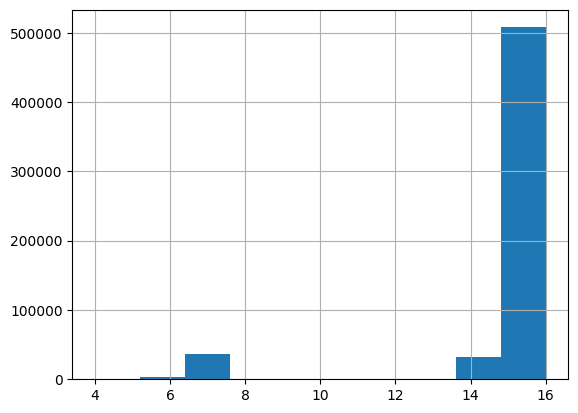

In [140]:
df.status_id.hist()

In [141]:
df.head()

,enable_auto_assign,enable_assign,is_home_lessons,is_external_lessons,lesson_cost,russian_level_id,home_country_id,is_confirmed,is_display,rating_id,rating,effective_rating,area_id,sex,show_on_map,rating_for_users,star_rating,review_num,subject_id,lesson_price,status_id,planned_lesson_number,pupil_category_new_id,lessons_per_week,teacher_sex,lesson_place_new,source_id,is_display_to_teachers
0,1.00,1.00,0.00,1.00,1000.00,1.00,64.00,1.00,1.00,16.00,6.00,0.00,1.00,2.00,1.00,805.50,4.90,6.00,2.00,1000.00,16.00,10.00,14.00,4.00,3.00,5.00,16.00,1.00
1,0.67,0.33,0.67,1.00,133.33,5.00,7.00,1.00,1.00,15.67,5.67,0.00,16.00,2.00,0.67,591.50,4.77,2.33,19.00,600.00,16.00,7.00,15.00,2.00,3.00,4.00,16.00,1.00
2,1.00,0.00,0.00,0.67,1533.33,5.00,7.00,1.00,1.00,16.00,6.00,2.67,1.00,1.67,1.00,1432.00,4.97,15.67,1.00,1500.00,16.00,10.00,12.00,5.00,3.00,3.00,16.00,1.00
3,0.75,0.00,1.00,0.75,775.00,5.00,7.00,1.00,0.50,9.25,2.75,1.50,2.00,2.00,0.75,603.12,4.80,6.50,12.00,1500.00,16.00,10.00,9.00,4.00,3.00,1.00,16.00,1.00
4,0.18,0.09,0.55,0.82,281.82,5.00,7.00,1.00,0.91,14.73,4.64,0.00,8.00,1.82,0.73,340.27,4.43,0.82,21.00,1000.00,16.00,10.00,16.00,4.00,3.00,4.00,16.00,1.00


все значения status_id:  
■	1 Не обработана   
■	2 Контактный телефон отдан клиенту   
■	3 Проверена   
■	4 Контактный телефон отдан преподавателю   
■	5 Проведено первое занятие   
■	6 Оплачена   
■	7 Снята   
■	8 Отложена   
■	9 Договорились о занятиях   
■	11 Созвонились   
■	12 !!! Не оплачена !!!   
■	13 Произведена оплата   
■	14 Оплачена 25/50%   
■	15 Подлежит оплате   
■	16 Снята.  

Изменим значение столбца status_id  
заявки как оплаченные в статусах 5,6,13,14,15

Из распределейний видно, что большинство заказов остануться не оплаченными.

In [142]:
len(df[df['status_id'].isin([5,6,13,14,15])]) / len(df)

0.06102971896979763

Оплаченных заказов всего 4,2%

Генерируем таргет paid

In [143]:
df['paid'] = df['status_id'].apply(lambda x: 1 if x in ([5,6,13,14,15]) else 0)

In [144]:
len(df[df['paid']==1]) / len(df)

0.06102971896979763

Удаляем status_id

In [145]:
df = df.drop(columns =['status_id'])

Из-за постоянной ошибки - оперативная память закончилась, далее поработаем пока на "коротком датасете"

In [146]:
df = df.head(50000)

Выделяем целевой признак

In [147]:
y = df['paid']

Обучающие признаки

In [148]:
x = df.drop(['paid'] , axis=1)

## Разделение данных на обучающую 75% и тестовую выборку 25%

In [149]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25,shuffle=True, random_state=42
    )

In [150]:
x_train.shape

(37500, 27)

In [151]:
x_test.shape

(12500, 27)

 При кросс-валидации и подборе гиперпараметров через GridSearchCV/RandomizedSearchCV на каждой итерации происходит разбиение на трейн и тест. Предобработка признаков (масштабирование, кодирование, векторизация) каждый раз должна проводиться независимо, иначе происходит утечка данных.

## Обработка категориальных признаков

In [152]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37500 entries, 27434 to 15795
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enable_auto_assign      37500 non-null  float64
 1   enable_assign           37500 non-null  float64
 2   is_home_lessons         37500 non-null  float64
 3   is_external_lessons     37500 non-null  float64
 4   lesson_cost             37500 non-null  float64
 5   russian_level_id        37500 non-null  float64
 6   home_country_id         37500 non-null  float64
 7   is_confirmed            37500 non-null  float64
 8   is_display              37500 non-null  float64
 9   rating_id               37500 non-null  float64
 10  rating                  37500 non-null  float64
 11  effective_rating        37500 non-null  float32
 12  area_id                 37500 non-null  float64
 13  sex                     37500 non-null  float64
 14  show_on_map             37500 non-

**************

# Обучение модели CatBoostRegressor

In [153]:
%%time

# модель
model = CatBoostRegressor(iterations = 100, max_depth=1, eval_metric='AUC')

grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

grid_search_result = model.grid_search(grid, X=x_train, y=y_train, plot=True)

# обучение модели на параметрах
model.fit(x_train, y_train)


predictions = model.predict(x_test)

display(model)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6145541	best: 0.6145541 (0)	total: 63ms	remaining: 6.23s
1:	test: 0.6249351	best: 0.6249351 (1)	total: 70.6ms	remaining: 3.46s
2:	test: 0.6253025	best: 0.6253025 (2)	total: 77.5ms	remaining: 2.51s
3:	test: 0.6324696	best: 0.6324696 (3)	total: 85.1ms	remaining: 2.04s
4:	test: 0.6345877	best: 0.6345877 (4)	total: 92.5ms	remaining: 1.76s
5:	test: 0.6318587	best: 0.6345877 (4)	total: 100ms	remaining: 1.57s
6:	test: 0.6344186	best: 0.6345877 (4)	total: 107ms	remaining: 1.43s
7:	test: 0.6336417	best: 0.6345877 (4)	total: 114ms	remaining: 1.31s
8:	test: 0.6342130	best: 0.6345877 (4)	total: 120ms	remaining: 1.22s
9:	test: 0.6333814	best: 0.6345877 (4)	total: 128ms	remaining: 1.15s
10:	test: 0.6339897	best: 0.6345877 (4)	total: 135ms	remaining: 1.09s
11:	test: 0.6337245	best: 0.6345877 (4)	total: 143ms	remaining: 1.04s
12:	test: 0.6337338	best: 0.6345877 (4)	total: 150ms	remaining: 1s
13:	test: 0.6339240	best: 0.6345877 (4)	total: 158ms	remaining: 968ms
14:	test: 0.6344166	best: 0.63

CatBoostError: only one of the parameters depth, max_depth should be initialized.

In [156]:
importances = model.feature_importances_
feature_list = list(x_train.columns)

feature_results = pd.DataFrame({'feature': feature_list,
                                'importance': importances})

feature_results = feature_results.sort_values('importance',ascending = False).reset_index(drop=True)
feature_results

,feature,importance
0,enable_auto_assign,None
1,enable_assign,None
2,is_home_lessons,None
3,is_external_lessons,None
4,lesson_cost,None
5,russian_level_id,None
6,home_country_id,None
7,is_confirmed,None
8,is_display,None
9,rating_id,None


В разделе "Подготовка таблиц" удалим столбцы с нулевой важностью

**************

# Вывод

С целью построение модели предсказания проведен исследовательский анализ данных, предобработка для искючения аномалий и трансформации таблиц.

Полученные данные использованы для обучения моделей CatBoostRegressor для прогноза вероятности оплаты курса.

раюота не закончена, требуется:
1. Обучить модель
2. Улучшить модель
3. По п. 1 и 2 получить значение AUC-ROC не менее .75 и рассмотреть возможные алгоритмы для повышения предсказательной возможности модели путем:
 - оптимизации подготоки данных
 - подбора характеристик модели
